<a href="https://colab.research.google.com/github/Pappas313/Social-Networks-with-Python-Networkx/blob/main/SN_Anal_Final_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Επιλογή Dadaset**

**Social circles: Facebook**

https://snap.stanford.edu/data/ego-Facebook.html

facebook_combined.txt

Dataset statistics
Nodes	4039
Edges	88234
Nodes in largest WCC	4039 (1.000)
Edges in largest WCC	88234 (1.000)
Nodes in largest SCC	4039 (1.000)
Edges in largest SCC	88234 (1.000)
Average clustering coefficient	0.6055
Number of triangles	1612010
Fraction of closed triangles	0.2647
Diameter (longest shortest path)	8
90-percentile effective diameter	4.7

**Social circles: Twitter**

https://snap.stanford.edu/data/ego-Twitter.html

twitter_combined.txt


Dataset statistics
Nodes	81306
Edges	1768149
Nodes in largest WCC	81306 (1.000)
Edges in largest WCC	1768149 (1.000)
Nodes in largest SCC	68413 (0.841)
Edges in largest SCC	1685163 (0.953)
Average clustering coefficient	0.5653
Number of triangles	13082506
Fraction of closed triangles	0.06415
Diameter (longest shortest path)	7
90-percentile effective diameter	4.5


**Social circles: Google+**

https://snap.stanford.edu/data/ego-Gplus.html

gplus_combined.txt


Dataset statistics
Nodes	107614
Edges	13673453
Nodes in largest WCC	107614 (1.000)
Edges in largest WCC	13673453 (1.000)
Nodes in largest SCC	69501 (0.646)
Edges in largest SCC	9168660 (0.671)
Average clustering coefficient	0.4901
Number of triangles	1073677742
Fraction of closed triangles	0.6552
Diameter (longest shortest path)	6
90-percentile effective diameter	3


**2)Υπολογισμός Βασικών μετρικών αυτές που διδάσκονται στο πρώτο μέρος του μαθήματος**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

**Εισαγωγή Dataset**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive



G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/twitter_combined.txt', nodetype= int)

G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/facebook_combined.txt', nodetype= int)

G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/gplus_combined.txt', nodetype= int)

In [ ]:
G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/facebook_combined.txt', nodetype= int)

**Basic Measures**

In [ ]:
def number_of_nodes(G):
    """Returns the number of nodes in the graph."""
    return G.number_of_nodes()

In [ ]:
def number_of_edges(G):
    """Returns the number of edges in the graph."""
    return G.number_of_edges()

**Degree Measures**

In [ ]:
def degree(G, nbunch=None, weight=None):
    """Returns a degree view of single node or of nbunch of nodes.
    If nbunch is omitted, then return degrees of *all* nodes.
    """
    return G.degree(nbunch, weight)

In [ ]:
def degree_histogram(G):
    """Returns a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    counts = Counter(d for n, d in G.degree())
    return [counts.get(i, 0) for i in range(max(counts) + 1)]

**Distance Metrics**

In [ ]:
def eccentricity(G, v=None, sp=None):
    """Returns the eccentricity of nodes in G.
    The eccentricity of a node v is the maximum distance from v to
    all other nodes in G.
    Parameters
    ----------
    G : NetworkX graph
       A graph
    v : node, optional
       Return value of specified node
    sp : dict of dicts, optional
       All pairs shortest path lengths as a dictionary of dictionaries
    Returns
    -------
    ecc : dictionary
       A dictionary of eccentricity values keyed by node.
    """
    #    if v is None:                # none, use entire graph
    #        nodes=G.nodes()
    #    elif v in G:               # is v a single node
    #        nodes=[v]
    #    else:                      # assume v is a container of nodes
    #        nodes=v
    order = G.order()

    e = {}
    for n in G.nbunch_iter(v):
        if sp is None:
            length = nx.single_source_shortest_path_length(G, n)
            L = len(length)
        else:
            try:
                length = sp[n]
                L = len(length)
            except TypeError as err:
                raise nx.NetworkXError('Format of "sp" is invalid.') from err
        if L != order:
            if G.is_directed():
                msg = (
                    "Found infinite path length because the digraph is not"
                    " strongly connected"
                )
            else:
                msg = "Found infinite path length because the graph is not" " connected"
            raise nx.NetworkXError(msg)

        e[n] = max(length.values())

    if v in G:
        return e[v]  # return single value
    else:
        return e
       

In [ ]:
def radius(G, e=None, usebounds=False):
    """Returns the radius of the graph G.
    The radius is the minimum eccentricity.
    Parameters
    ----------
    G : NetworkX graph
       A graph
    e : eccentricity dictionary, optional
      A precomputed dictionary of eccentricities.
    Returns
    -------
    r : integer
       Radius of graph
    """
    if usebounds is True and e is None and not G.is_directed():
        return _extrema_bounding(G, compute="radius")
    if e is None:
        e = eccentricity(G)
    return min(e.values())

In [ ]:
def diameter(G, e=None, usebounds=False):
    """Returns the diameter of the graph G.
    The diameter is the maximum eccentricity.
    Parameters
    ----------
    G : NetworkX graph
       A graph
    e : eccentricity dictionary, optional
      A precomputed dictionary of eccentricities.
    Returns
    -------
    d : integer
       Diameter of graph
    See Also
    --------
    eccentricity
    """
    if usebounds is True and e is None and not G.is_directed():
        return _extrema_bounding(G, compute="diameter")
    if e is None:
        e = eccentricity(G)
    return max(e.values())

**Centralities**

In [ ]:
def closeness_centrality(G, u=None, distance=None, wf_improved=True):
    r"""Compute closeness centrality for nodes.

    Closeness centrality [1]_ of a node `u` is the reciprocal of the
    average shortest path distance to `u` over all `n-1` reachable nodes.

    .. math::

        C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},

    where `d(v, u)` is the shortest-path distance between `v` and `u`,
    and `n` is the number of nodes that can reach `u`. Notice that the
    closeness distance function computes the incoming distance to `u`
    for directed graphs. To use outward distance, act on `G.reverse()`.

    Notice that higher values of closeness indicate higher centrality.

    Wasserman and Faust propose an improved formula for graphs with
    more than one connected component. The result is "a ratio of the
    fraction of actors in the group who are reachable, to the average
    distance" from the reachable actors [2]_. You might think this
    scale factor is inverted but it is not. As is, nodes from small
    components receive a smaller closeness value. Letting `N` denote
    the number of nodes in the graph,

    .. math::

        C_{WF}(u) = \frac{n-1}{N-1} \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)},

    Parameters
    ----------
    G : graph
      A NetworkX graph

    u : node, optional
      Return only the value for node u

    distance : edge attribute key, optional (default=None)
      Use the specified edge attribute as the edge distance in shortest
      path calculations

    wf_improved : bool, optional (default=True)
      If True, scale by the fraction of nodes reachable. This gives the
      Wasserman and Faust improved formula. For single component graphs
      it is the same as the original formula.

    Returns
    -------
    nodes : dictionary
      Dictionary of nodes with closeness centrality as the value.

    See Also
    --------
    betweenness_centrality, load_centrality, eigenvector_centrality,
    degree_centrality, incremental_closeness_centrality

    Notes
    -----
    The closeness centrality is normalized to `(n-1)/(|G|-1)` where
    `n` is the number of nodes in the connected part of graph
    containing the node.  If the graph is not completely connected,
    this algorithm computes the closeness centrality for each
    connected part separately scaled by that parts size.

    If the 'distance' keyword is set to an edge attribute key then the
    shortest-path length will be computed using Dijkstra's algorithm with
    that edge attribute as the edge weight.

    The closeness centrality uses *inward* distance to a node, not outward.
    If you want to use outword distances apply the function to `G.reverse()`

    In NetworkX 2.2 and earlier a bug caused Dijkstra's algorithm to use the
    outward distance rather than the inward distance. If you use a 'distance'
    keyword and a DiGraph, your results will change between v2.2 and v2.3.

    References
    ----------
    .. [1] Linton C. Freeman: Centrality in networks: I.
       Conceptual clarification. Social Networks 1:215-239, 1979.
       https://doi.org/10.1016/0378-8733(78)90021-7
    .. [2] pg. 201 of Wasserman, S. and Faust, K.,
       Social Network Analysis: Methods and Applications, 1994,
       Cambridge University Press.
    """
    if G.is_directed():
        G = G.reverse()  # create a reversed graph view

    if distance is not None:
        # use Dijkstra's algorithm with specified attribute as edge weight
        path_length = functools.partial(
            nx.single_source_dijkstra_path_length, weight=distance
        )
    else:
        path_length = nx.single_source_shortest_path_length

    if u is None:
        nodes = G.nodes
    else:
        nodes = [u]
    closeness_centrality = {}
    for n in nodes:
        sp = path_length(G, n)
        totsp = sum(sp.values())
        len_G = len(G)
        _closeness_centrality = 0.0
        if totsp > 0.0 and len_G > 1:
            _closeness_centrality = (len(sp) - 1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if wf_improved:
                s = (len(sp) - 1.0) / (len_G - 1)
                _closeness_centrality *= s
        closeness_centrality[n] = _closeness_centrality
    if u is not None:
        return closeness_centrality[u]
    else:
        return closeness_centrality

In [ ]:
def degree_centrality(G):
    """Compute the degree centrality for nodes.

    The degree centrality for a node v is the fraction of nodes it
    is connected to.

    Parameters
    ----------
    G : graph
      A networkx graph

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with degree centrality as the value.

    See Also
    --------
    betweenness_centrality, load_centrality, eigenvector_centrality

    Notes
    -----
    The degree centrality values are normalized by dividing by the maximum
    possible degree in a simple graph n-1 where n is the number of nodes in G.

    For multigraphs or graphs with self loops the maximum degree might
    be higher than n-1 and values of degree centrality greater than 1
    are possible.
    """
    if len(G) <= 1:
        return {n: 1 for n in G}

    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.degree()}
    return centrality

In [ ]:
def clustering(G, nodes=None, weight=None):
    r"""Compute the clustering coefficient for nodes.

    For unweighted graphs, the clustering of a node :math:`u`
    is the fraction of possible triangles through that node that exist,

    .. math::

      c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},

    where :math:`T(u)` is the number of triangles through node :math:`u` and
    :math:`deg(u)` is the degree of :math:`u`.

    For weighted graphs, there are several ways to define clustering [1]_.
    the one used here is defined
    as the geometric average of the subgraph edge weights [2]_,

    .. math::

       c_u = \frac{1}{deg(u)(deg(u)-1))}
             \sum_{vw} (\hat{w}_{uv} \hat{w}_{uw} \hat{w}_{vw})^{1/3}.

    The edge weights :math:`\hat{w}_{uv}` are normalized by the maximum weight
    in the network :math:`\hat{w}_{uv} = w_{uv}/\max(w)`.

    The value of :math:`c_u` is assigned to 0 if :math:`deg(u) < 2`.

    Additionally, this weighted definition has been generalized to support negative edge weights [3]_.

    For directed graphs, the clustering is similarly defined as the fraction
    of all possible directed triangles or geometric average of the subgraph
    edge weights for unweighted and weighted directed graph respectively [4]_.

    .. math::

       c_u = \frac{2}{deg^{tot}(u)(deg^{tot}(u)-1) - 2deg^{\leftrightarrow}(u)}
             T(u),

    where :math:`T(u)` is the number of directed triangles through node
    :math:`u`, :math:`deg^{tot}(u)` is the sum of in degree and out degree of
    :math:`u` and :math:`deg^{\leftrightarrow}(u)` is the reciprocal degree of
    :math:`u`.


    Parameters
    ----------
    G : graph

    nodes : container of nodes, optional (default=all nodes in G)
       Compute clustering for nodes in this container.

    weight : string or None, optional (default=None)
       The edge attribute that holds the numerical value used as a weight.
       If None, then each edge has weight 1.

    Returns
    -------
    out : float, or dictionary
       Clustering coefficient at specified nodes

    Examples
    --------
    >>> G = nx.complete_graph(5)
    >>> print(nx.clustering(G, 0))
    1.0
    >>> print(nx.clustering(G))
    {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

    Notes
    -----
    Self loops are ignored.

    References
    ----------
    .. [1] Generalizations of the clustering coefficient to weighted
       complex networks by J. Saramäki, M. Kivelä, J.-P. Onnela,
       K. Kaski, and J. Kertész, Physical Review E, 75 027105 (2007).
       http://jponnela.com/web_documents/a9.pdf
    .. [2] Intensity and coherence of motifs in weighted complex
       networks by J. P. Onnela, J. Saramäki, J. Kertész, and K. Kaski,
       Physical Review E, 71(6), 065103 (2005).
    .. [3] Generalization of Clustering Coefficients to Signed Correlation Networks
       by G. Costantini and M. Perugini, PloS one, 9(2), e88669 (2014).
    .. [4] Clustering in complex directed networks by G. Fagiolo,
       Physical Review E, 76(2), 026107 (2007).
    """
    if G.is_directed():
        if weight is not None:
            td_iter = _directed_weighted_triangles_and_degree_iter(G, nodes, weight)
            clusterc = {
                v: 0 if t == 0 else t / ((dt * (dt - 1) - 2 * db) * 2)
                for v, dt, db, t in td_iter
            }
        else:
            td_iter = _directed_triangles_and_degree_iter(G, nodes)
            clusterc = {
                v: 0 if t == 0 else t / ((dt * (dt - 1) - 2 * db) * 2)
                for v, dt, db, t in td_iter
            }
    else:
        # The formula 2*T/(d*(d-1)) from docs is t/(d*(d-1)) here b/c t==2*T
        if weight is not None:
            td_iter = _weighted_triangles_and_degree_iter(G, nodes, weight)
            clusterc = {v: 0 if t == 0 else t / (d * (d - 1)) for v, d, t in td_iter}
        else:
            td_iter = _triangles_and_degree_iter(G, nodes)
            clusterc = {v: 0 if t == 0 else t / (d * (d - 1)) for v, d, t, _ in td_iter}
    if nodes in G:
        # Return the value of the sole entry in the dictionary.
        return clusterc[nodes]
    return clusterc

In [ ]:
def average_clustering(G, nodes=None, weight=None, count_zeros=True):
    r"""Compute the average clustering coefficient for the graph G.

    The clustering coefficient for the graph is the average,

    .. math::

       C = \frac{1}{n}\sum_{v \in G} c_v,

    where :math:`n` is the number of nodes in `G`.

    Parameters
    ----------
    G : graph

    nodes : container of nodes, optional (default=all nodes in G)
       Compute average clustering for nodes in this container.

    weight : string or None, optional (default=None)
       The edge attribute that holds the numerical value used as a weight.
       If None, then each edge has weight 1.

    count_zeros : bool
       If False include only the nodes with nonzero clustering in the average.

    Returns
    -------
    avg : float
       Average clustering

    Examples
    --------
    >>> G = nx.complete_graph(5)
    >>> print(nx.average_clustering(G))
    1.0

    Notes
    -----
    This is a space saving routine; it might be faster
    to use the clustering function to get a list and then take the average.

    Self loops are ignored.

    References
    ----------
    .. [1] Generalizations of the clustering coefficient to weighted
       complex networks by J. Saramäki, M. Kivelä, J.-P. Onnela,
       K. Kaski, and J. Kertész, Physical Review E, 75 027105 (2007).
       http://jponnela.com/web_documents/a9.pdf
    .. [2] Marcus Kaiser,  Mean clustering coefficients: the role of isolated
       nodes and leafs on clustering measures for small-world networks.
       https://arxiv.org/abs/0802.2512
    """
    c = clustering(G, nodes, weight=weight).values()
    if not count_zeros:
        c = [v for v in c if abs(v) > 0]
    return sum(c) / len(c)

In [ ]:
def transitivity(G):
    r"""Compute graph transitivity, the fraction of all possible triangles
    present in G.

    Possible triangles are identified by the number of "triads"
    (two edges with a shared vertex).

    The transitivity is

    .. math::

        T = 3\frac{\#triangles}{\#triads}.

    Parameters
    ----------
    G : graph

    Returns
    -------
    out : float
       Transitivity

    Examples
    --------
    >>> G = nx.complete_graph(5)
    >>> print(nx.transitivity(G))
    1.0
    """
    triangles_contri = [
        (t, d * (d - 1)) for v, d, t, _ in _triangles_and_degree_iter(G)
    ]
    # If the graph is empty
    if len(triangles_contri) == 0:
        return 0
    triangles, contri = map(sum, zip(*triangles_contri))
    return 0 if triangles == 0 else triangles / contri

**Statistical Analysis**

Degree Analysis

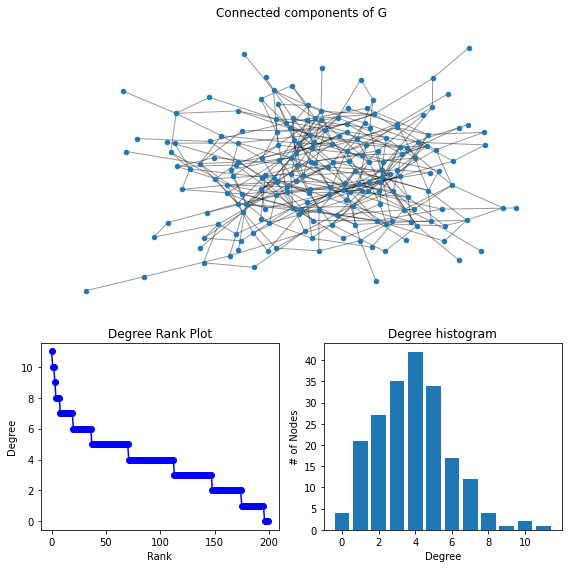

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.gnp_random_graph(200, 0.02, seed=20374196)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=1768149)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

 **3) Χρησιμοποιείτε κάποιον από τους network generators που διδάσκονται στο μάθημα
προσπαθώντας να παράξετε ένα συνθετικό δίκτυο με όσο το δυνατόν πιο όμοια
χαρακτηριστικά με το πραγματικό. Τουλάχιστον με παραπλήσιο αριθμό κόμβων και
ακμών.**


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
G1 = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/facebook_combined.txt', nodetype= int)

In [ ]:
print(nx.info(G1))

Graph with 4039 nodes and 88234 edges


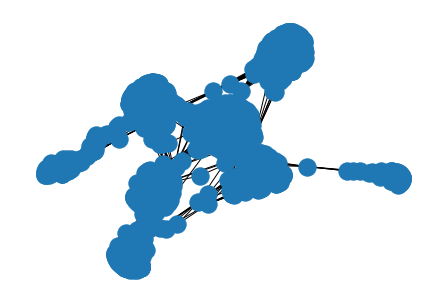

In [ ]:
nx.draw(G1)

**4) Υπολογίζετε τις ίδιες μετρικές και στο συνθετικό δίκτυο**

betweenness Centrality

[107, 1684, 3437, 1912, 1085]

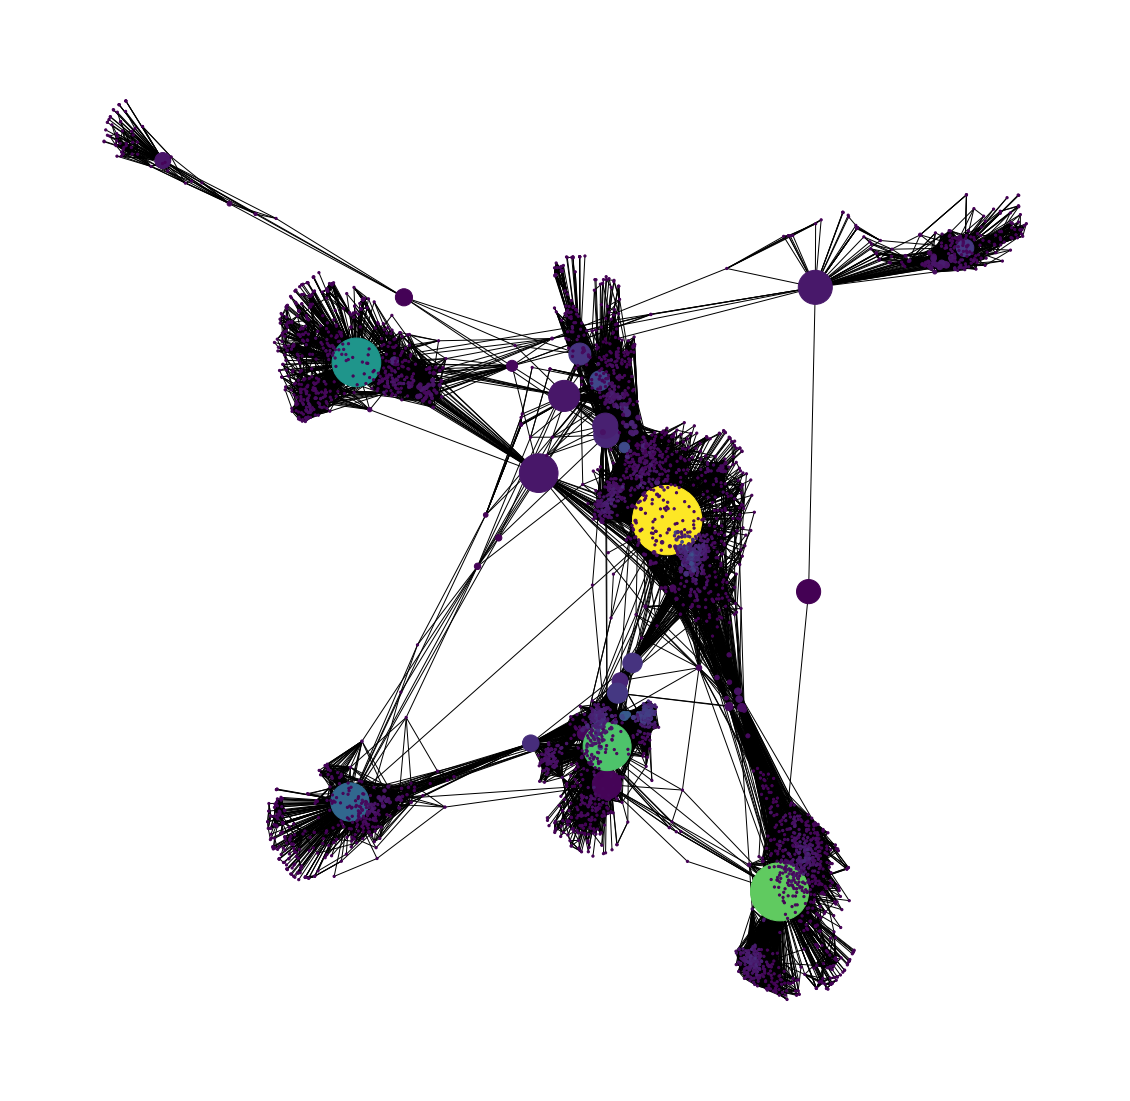

In [ ]:
pos = nx.spring_layout(G1)
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

Degree Centrality

[107, 1684, 1912, 3437, 0]

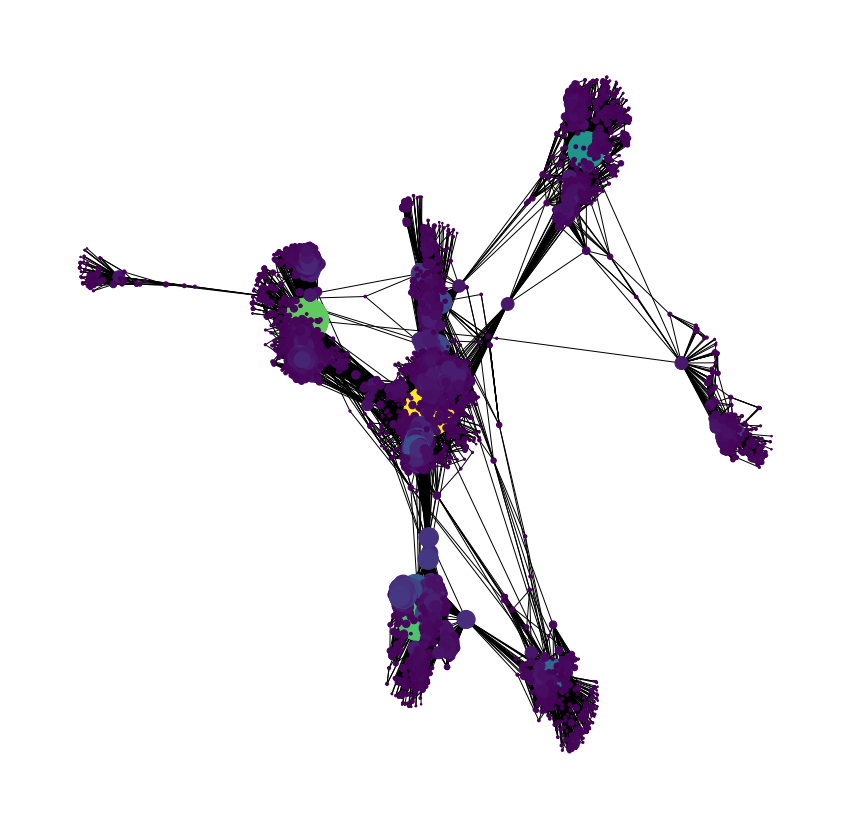

In [ ]:
pos = nx.spring_layout(G1)
degCent = nx.degree_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]

Closeness Centrality

[107, 58, 428, 563, 1684]

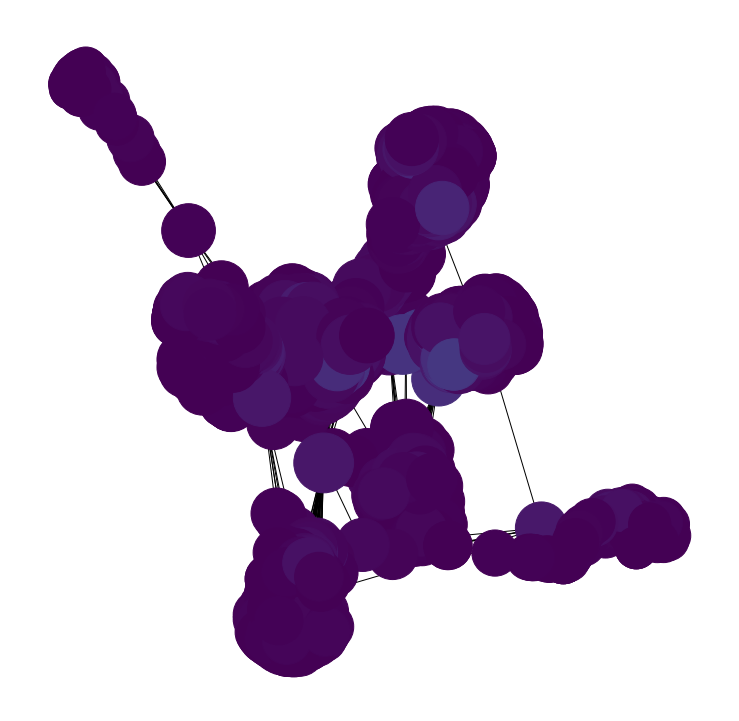

In [ ]:
pos = nx.spring_layout(G1)
cloCent = nx.closeness_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

Degree Graph

In [ ]:
max(x for x,y in nx.degree(G1))

4038

shortest path in graph

In [ ]:
sources = [20,40,65,75]
targets = [650,802,920,1010] 
for i in range(4):
    path = nx.shortest_path(G1,source=sources[i],target=targets[i])
    length = nx.shortest_path_length(G1,source=sources[i],target=targets[i],method='dijkstra')
    print("Shortest Path between Node ", str(sources[i])," ---> ", str(targets[i]), " is ",
          str(path), " ,Length = ", str(length))

Shortest Path between Node  20  --->  650  is  [20, 0, 34, 414, 650]  ,Length =  4
Shortest Path between Node  40  --->  802  is  [40, 0, 58, 1684, 860, 698, 686, 802]  ,Length =  7
Shortest Path between Node  65  --->  920  is  [65, 0, 107, 920]  ,Length =  3
Shortest Path between Node  75  --->  1010  is  [75, 0, 107, 1010]  ,Length =  3


all neighbors the nodes

In [ ]:
neigh = [1,20,40,65,75,90,1000,]
for i in range(len(neigh)):
    all_neighbors = list(nx.classes.function.all_neighbors(G1,neigh[i]))
    print("All neighbors for Node ", str(neigh[i])," ---> ", str(all_neighbors))

All neighbors for Node  1  --->  [0, 48, 53, 54, 73, 88, 92, 119, 126, 133, 194, 236, 280, 299, 315, 322, 346]
All neighbors for Node  20  --->  [0, 2, 14, 41, 44, 111, 115, 149, 162, 214, 226, 312, 326, 333, 343]
All neighbors for Node  40  --->  [0, 21, 25, 26, 29, 56, 67, 72, 77, 113, 132, 133, 141, 142, 158, 169, 172, 199, 200, 203, 212, 213, 224, 231, 232, 239, 257, 258, 265, 271, 272, 274, 277, 280, 298, 304, 307, 315, 317, 322, 325, 329, 332, 334]
All neighbors for Node  65  --->  [0, 7, 13, 25, 82, 118, 203, 252, 261, 297, 314, 339]
All neighbors for Node  75  --->  [0, 9, 56, 67, 85, 170, 188, 200, 258, 272, 274, 304, 322, 323]
All neighbors for Node  90  --->  [0, 179]
All neighbors for Node  1000  --->  [107, 924, 974, 985, 1010, 1127, 1134, 1228, 1304, 1474, 1640, 1667, 1703, 1725, 1759, 1840]


In [ ]:
list(nx.selfloop_edges(G1, keys=True, data=True))
#None []

[]

count degree nodes

In [ ]:
d = dict(G1.degree()).values()
from collections import Counter
Counter(d)

Counter({1: 75,
         2: 98,
         3: 93,
         4: 99,
         5: 93,
         6: 98,
         7: 98,
         8: 111,
         9: 100,
         10: 95,
         11: 81,
         12: 82,
         13: 79,
         14: 87,
         15: 106,
         16: 82,
         17: 76,
         18: 73,
         19: 72,
         20: 63,
         21: 52,
         22: 63,
         23: 53,
         24: 60,
         25: 55,
         26: 56,
         27: 49,
         28: 37,
         29: 38,
         30: 40,
         31: 38,
         32: 44,
         33: 35,
         34: 43,
         35: 36,
         36: 43,
         37: 43,
         38: 44,
         39: 29,
         40: 27,
         41: 29,
         42: 21,
         43: 29,
         44: 21,
         45: 19,
         46: 24,
         47: 24,
         48: 24,
         49: 33,
         50: 25,
         51: 20,
         52: 19,
         53: 15,
         54: 23,
         55: 23,
         56: 18,
         57: 23,
         58: 15,
         59: 11,
   

Eeigenvector Centrality

(-1.2038083216547968,
 1.171193196475506,
 -1.1652392771840094,
 1.2057466533780097)

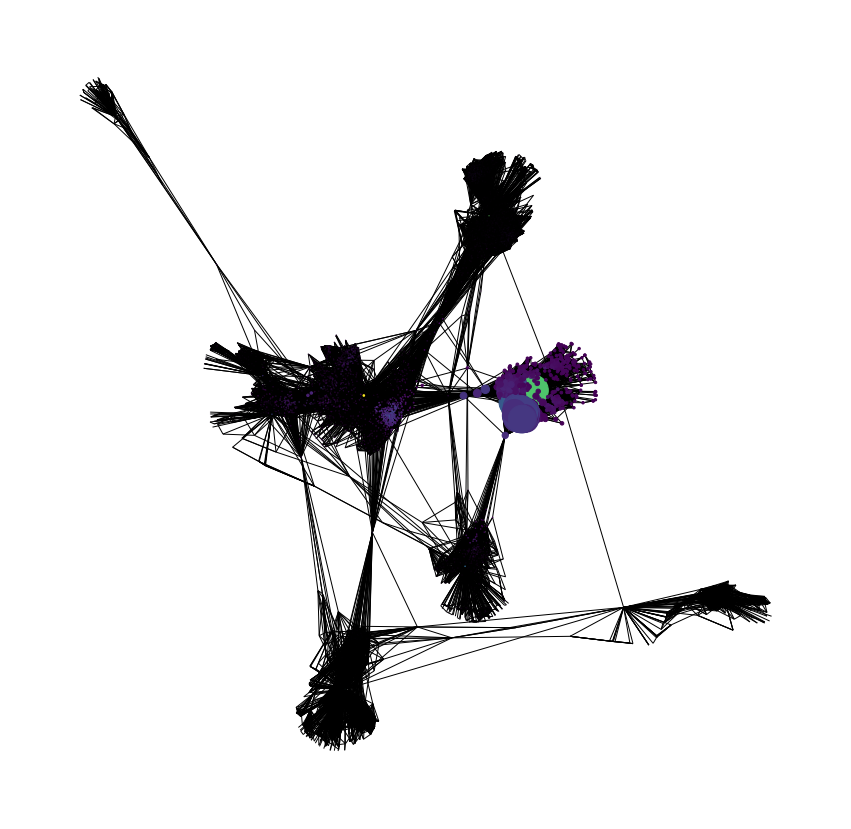

In [ ]:
#pos = nx.spring_layout(G1)
eigCent = nx.eigenvector_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [ ]:
sorted(eigCent, key=eigCent.get, reverse=True)[:5]

[1912, 2266, 2206, 2233, 2464]

In [ ]:
list(nx.algorithms.community.k_clique_communities(G1,k=2))

NameError: ignored

In [ ]:
list(nx.algorithms.core.k_core(G1,k=3))

NameError: ignored

In [ ]:
#nx.algorithms.link_analysis.pagerank_alg.pagerank(G1)

In [ ]:
nx.degree_histogram(G1)

NameError: ignored

In [ ]:
nx.algorithms.graph_clique_number(G1)

NameError: ignored

**2ο στάδιο) Υλοποίηση αλγορίθμων πάνω στους 2 γράφους.**

---


- Επιλέξτε έναν αλγόριθμο πρόβλεψης ακμών και υλοποιήστε ότι είναι απαραίτητο ώστε
να τον εφαρμόσετε με επιτυχία στον πάνω στον συνθετικό (και στον πραγματικό) γράφο.
- Αξιολογείστε τον αλγόριθμο με χρήση μιας τεχνικής validation (k-fold, leave one out).
- Εντοπίστε κλίκες στους γράφους με εφαρμογή κατάλληλου αλγορίθμου. Παρουσιάστε
χαρακτηριστικά παραδείγματα.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from statistics import mean
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/twitter_combined.txt', nodetype= int)

G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/gplus_combined.txt', nodetype= int)

G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/facebook_combined.txt', nodetype= int)


In [ ]:
G = nx.read_edgelist('gdrive/My Drive/Colab Notebooks/facebook_combined.txt', nodetype= int)

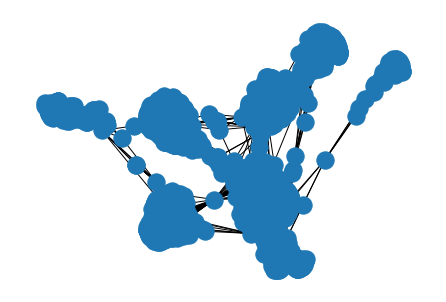

In [ ]:
nx.draw(G)

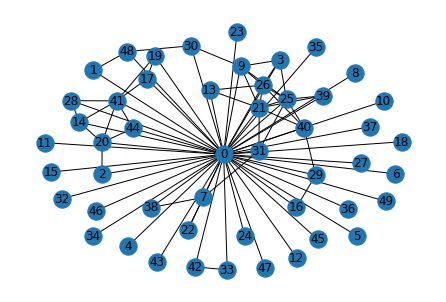

In [ ]:
nx.draw(G.subgraph(list(range(50))),with_labels=True)

(array([266., 290., 209., 276., 248., 188., 221., 115., 176., 160.,  75.,
        122.,  78., 122., 100.,  50.,  69.,  48.,  82.,  54.,  46.,  56.,
         47.,  39.,  55.,  29.,  49.,  35.,  23.,  37.,  12.,  41.,  24.,
         18.,  26.,  18.,  28.,  26.,  13.,  19.,  24.,  13.,  16.,  14.,
         15.,  15.,  23.,  20.,   9.,  16.,  10.,  11.,  12.,  10.,   8.,
         14.,   4.,  11.,   6.,  12.,  14.,   6.,  10.,  11.,   6.,  12.,
          4.,  13.,   7.,   8.,  11.,   8.,  13.,   6.,   6.,  10.,   5.,
          5.,   7.,   1.,   2.,   0.,   1.,   1.,   2.,   2.,   1.,   1.,
          1.,   3.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

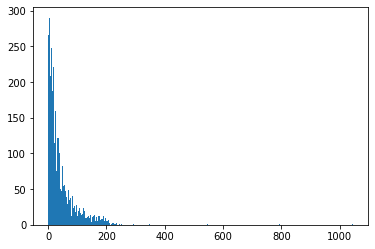

In [ ]:
plt.hist([val for (node,val) in G.degree()],400)

In [ ]:
common_neighbors = {}
cn_similarity = {}
for u,v in G.edges:
    common_neighbors[u,v]=list(nx.common_neighbors(G,u,v))
    cn_similarity[u,v]=len(common_neighbors[u,v])

In [ ]:
G_complement = nx.complement(G)

In [ ]:
non_edge_cn_similarity = {}
for u,v in G_complement.edges:
    non_edge_cn_similarity[u,v] = len(list(nx.common_neighbors(G,u,v)))

(array([7.800e+01, 8.090e+02, 1.141e+03, 1.294e+03, 1.328e+03, 1.389e+03,
        1.467e+03, 1.476e+03, 1.538e+03, 1.404e+03, 1.439e+03, 1.450e+03,
        1.423e+03, 1.522e+03, 1.546e+03, 1.457e+03, 1.368e+03, 1.259e+03,
        1.190e+03, 1.160e+03, 1.175e+03, 1.174e+03, 1.181e+03, 1.062e+03,
        1.052e+03, 1.004e+03, 9.710e+02, 9.360e+02, 9.460e+02, 9.660e+02,
        8.610e+02, 9.060e+02, 8.640e+02, 7.880e+02, 7.930e+02, 7.900e+02,
        7.620e+02, 7.500e+02, 7.800e+02, 7.010e+02, 7.480e+02, 7.120e+02,
        0.000e+00, 7.430e+02, 6.860e+02, 6.890e+02, 7.360e+02, 6.670e+02,
        6.230e+02, 6.120e+02, 5.860e+02, 5.580e+02, 5.730e+02, 5.350e+02,
        6.220e+02, 5.590e+02, 5.120e+02, 5.050e+02, 4.890e+02, 4.780e+02,
        5.280e+02, 5.020e+02, 4.880e+02, 4.990e+02, 4.850e+02, 4.960e+02,
        4.580e+02, 4.530e+02, 4.580e+02, 4.830e+02, 4.480e+02, 3.970e+02,
        4.610e+02, 4.400e+02, 4.080e+02, 3.830e+02, 3.920e+02, 4.200e+02,
        3.990e+02, 3.850e+02, 4.150e+0

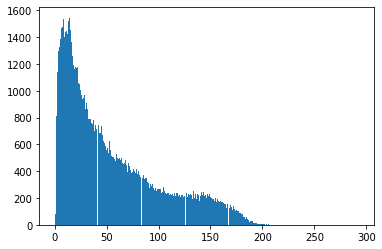

In [ ]:
plt.hist(cn_similarity.values(),300)

In [ ]:
max(cn_similarity.values())

293

(array([7.877702e+06, 8.567900e+04, 2.445400e+04, 1.929000e+04,
        1.228700e+04, 6.894000e+03, 7.132000e+03, 5.679000e+03,
        3.278000e+03, 3.617000e+03, 3.030000e+03, 1.883000e+03,
        2.221000e+03, 1.844000e+03, 1.192000e+03, 1.500000e+03,
        1.255000e+03, 8.440000e+02, 9.220000e+02, 7.270000e+02,
        5.450000e+02, 5.800000e+02, 5.260000e+02, 3.790000e+02,
        3.890000e+02, 3.260000e+02, 2.280000e+02, 2.810000e+02,
        2.650000e+02, 1.990000e+02, 2.280000e+02, 2.050000e+02,
        1.530000e+02, 1.620000e+02, 1.320000e+02, 7.200000e+01,
        9.800000e+01, 8.800000e+01, 4.900000e+01, 5.700000e+01,
        2.800000e+01, 1.900000e+01, 2.300000e+01, 2.400000e+01,
        7.000000e+00, 6.000000e+00, 3.000000e+00, 1.000000e+00,
        1.000000e+00, 3.000000e+00]),
 array([  0.  ,   3.66,   7.32,  10.98,  14.64,  18.3 ,  21.96,  25.62,
         29.28,  32.94,  36.6 ,  40.26,  43.92,  47.58,  51.24,  54.9 ,
         58.56,  62.22,  65.88,  69.54,  73.2 ,  7

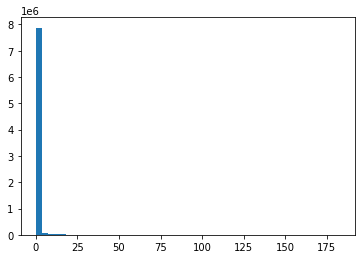

In [ ]:
plt.hist(non_edge_cn_similarity.values(),50)

In [ ]:
mean(cn_similarity.values())

54.80914386744339

In [ ]:
mean(non_edge_cn_similarity.values())

0.5552364858792039

In [ ]:
existing_edge_list = list(G.edges)
non_existing_edge_list = list(G_complement.edges)
existing_edge_list_length = len(existing_edge_list)
non_existing_edge_list_length = len(non_existing_edge_list)

In [ ]:
def select_random_edges(edge_list,n):
    random_edges = []
    counter = 0
    edge_list_length = len(edge_list)
    while True:
        index = random.randint(0,edge_list_length)
        selected_edge = edge_list[index]
        if selected_edge in set(random_edges):
            continue
        random_edges.append(selected_edge)
        if counter == n:
            return random_edges
        counter += 1

In [ ]:
n = int(0.1*existing_edge_list_length)
random_edges = select_random_edges(existing_edge_list,n)
random_non_edges = select_random_edges(non_existing_edge_list,n)

In [ ]:
def get_metrics(threshold):
    true_positive = 0
    false_positive = 0
    for i in range(len(random_edges)):
        if cn_similarity[random_edges[i]]>threshold:
            true_positive += 1
        if non_edge_cn_similarity[random_non_edges[i]]>threshold:
            false_positive += 1
    false_negative = len(random_edges)-true_positive
    true_negative = len(random_non_edges)-false_negative
    tpr = true_positive/(false_negative+true_positive)
    fpr = false_positive/(false_positive+true_negative)
    return {'threshold':threshold},{'tpr':tpr},{'fpr':fpr}

In [ ]:
cn_metrics = []
for t in range(0,int(mean(cn_similarity.values())),5):
    cn_metrics.append(get_metrics(t))

In [ ]:
cn_metrics

[({'threshold': 0}, {'tpr': 0.9993200362647325}, {'fpr': 0.14196750024326166}),
 ({'threshold': 5},
  {'tpr': 0.9312103354487761},
  {'fpr': 0.017927572606669058}),
 ({'threshold': 10},
  {'tpr': 0.8531278331822303},
  {'fpr': 0.011035207566999475}),
 ({'threshold': 15},
  {'tpr': 0.7697189483227561},
  {'fpr': 0.00904581266413773}),
 ({'threshold': 20},
  {'tpr': 0.6984360834088849},
  {'fpr': 0.009004663129120438}),
 ({'threshold': 25},
  {'tpr': 0.6362194016319129},
  {'fpr': 0.007951934970842905}),
 ({'threshold': 30},
  {'tpr': 0.5804623753399819},
  {'fpr': 0.007941119504164245}),
 ({'threshold': 35},
  {'tpr': 0.5328649138712602},
  {'fpr': 0.006759611322348965}),
 ({'threshold': 40}, {'tpr': 0.49127379873073435}, {'fpr': 0.00390625}),
 ({'threshold': 45},
  {'tpr': 0.44741613780598366},
  {'fpr': 0.0030303030303030303}),
 ({'threshold': 50},
  {'tpr': 0.41421124206708976},
  {'fpr': 0.002728512960436562})]

In [ ]:
auroc_x = []
aurox_y = []
for i in range(len(cn_metrics)):
    auroc_x.append(cn_metrics[i][2]['fpr'])
    aurox_y.append(cn_metrics[i][1]['tpr'])

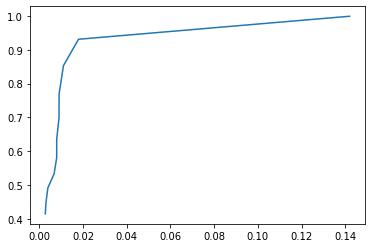

In [ ]:
plt.plot(auroc_x,aurox_y)

**Logistic regression**

In [ ]:
data = {}
for edge in cn_similarity:
    rai = nx.resource_allocation_index(G,[edge])
    ra_sim = list(rai)[0][2]
    data[cn_similarity[edge],ra_sim]=1
for edge in non_edge_cn_similarity:
    rai = nx.resource_allocation_index(G,[edge])
    ra_sim = list(rai)[0][2]
    data[non_edge_cn_similarity[edge],ra_sim]=0

In [ ]:
X_data = [list(x) for x in list(data.keys())]
Y_data = list(data.values())

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.3,random_state=0)

In [ ]:
log_regression = LogisticRegression()

In [ ]:
log_regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [ ]:
print(auc)

0.9023211287326586


**3ο στάδιο) Προσομοίωση διάδοσης πάνω στον γράφο**

---

- Στο γράφο που επιλέξατε (ή σε κάποιο άλλο γράφο σε περίπτωση που ο αρχικός δεν
είναι κατάλληλος) επιλέξτε τα k-seeds που θα μεγιστοποιήσουν την επιρροή στο γράφο
- Ορίστε τις παραμέτρους για την εύρεση του βέλτιστου πλήθους των k-seeds καθώς και
των παραμέτρων που επιτυγχάνουν influence το 60% του δικτύου.

In [ ]:
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 6.6 MB/s 
     |████████████████████████████████| 3.1 MB 47.8 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=d1fb92dbbf332db89f67603d3c39269efd1afd557df8ba374ec00cb0fcf1ca46
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph


In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

no display found. Using non-interactive Agg backend


In [ ]:
import collections
%matplotlib inline
def plot_degree_dist(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())

  fig, ax = plt.subplots()
  plt.bar(deg, cnt, width=0.80, color="b")

  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  ax.set_xticks([d + 0.4 for d in deg])
  ax.set_xticklabels(deg)

  # draw graph in inset
  plt.axes([0.4, 0.4, 0.5, 0.5])
  Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
  pos = nx.spring_layout(G)
  plt.axis("off")
  nx.draw_networkx_nodes(G, pos, node_size=20)
  nx.draw_networkx_edges(G, pos, alpha=0.4)
  plt.show()

# **Threshold**

---



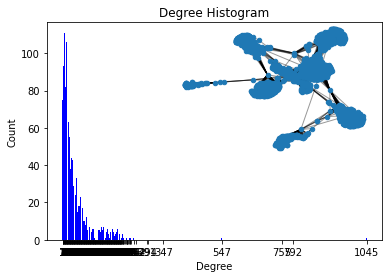

396


In [ ]:
# Network topology
# g = nx.erdos_renyi_graph(100, 0.1)
g = nx.barabasi_albert_graph(200,2)
plot_degree_dist(G)
print(g.number_of_edges())

Initially the 5% of the overall population (10 out of the 200 nodes) is infected. All edges have a threshold of 0.25 for allowing infection

{'Susceptible': 0, 'Infected': 1}


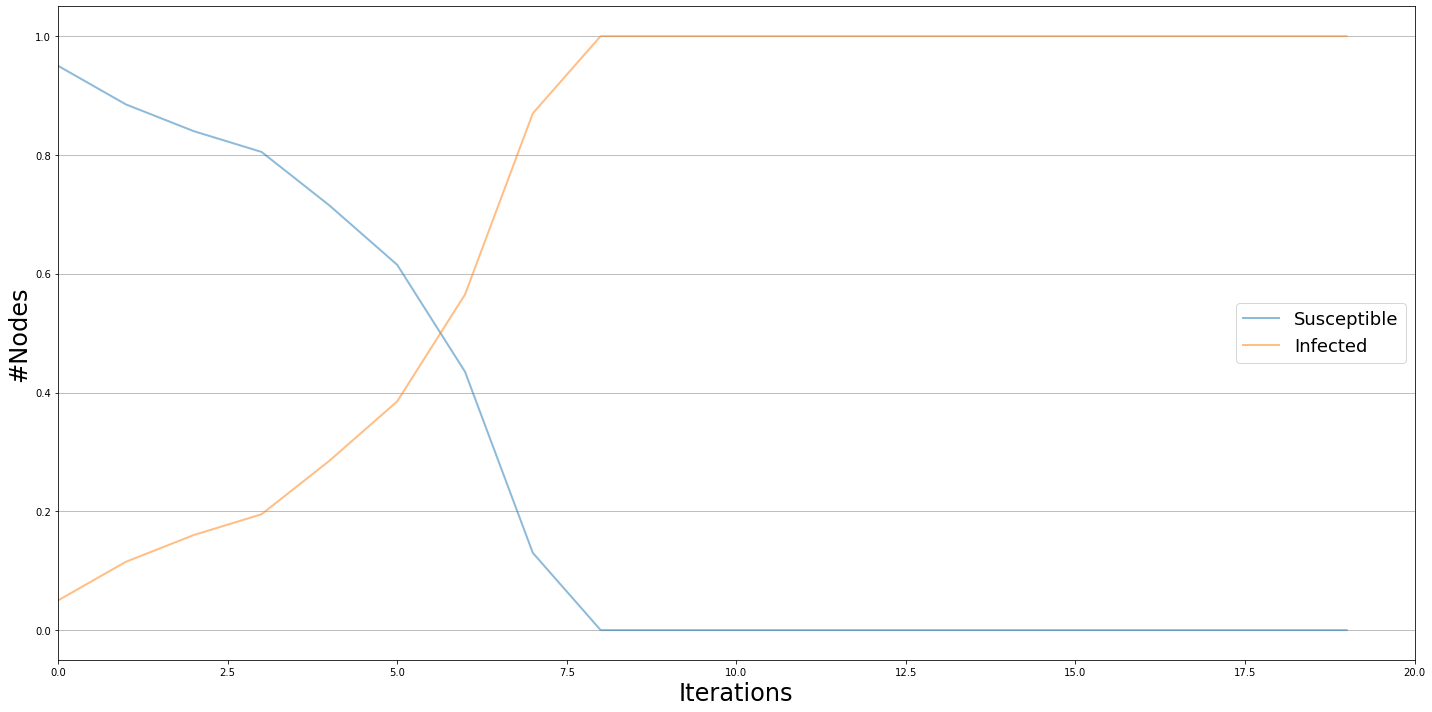

In [ ]:
# Model selection
model = ep.ThresholdModel(g)
print(model.available_statuses)
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.05)
# Setting node parameters
threshold = 0.25
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)
# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

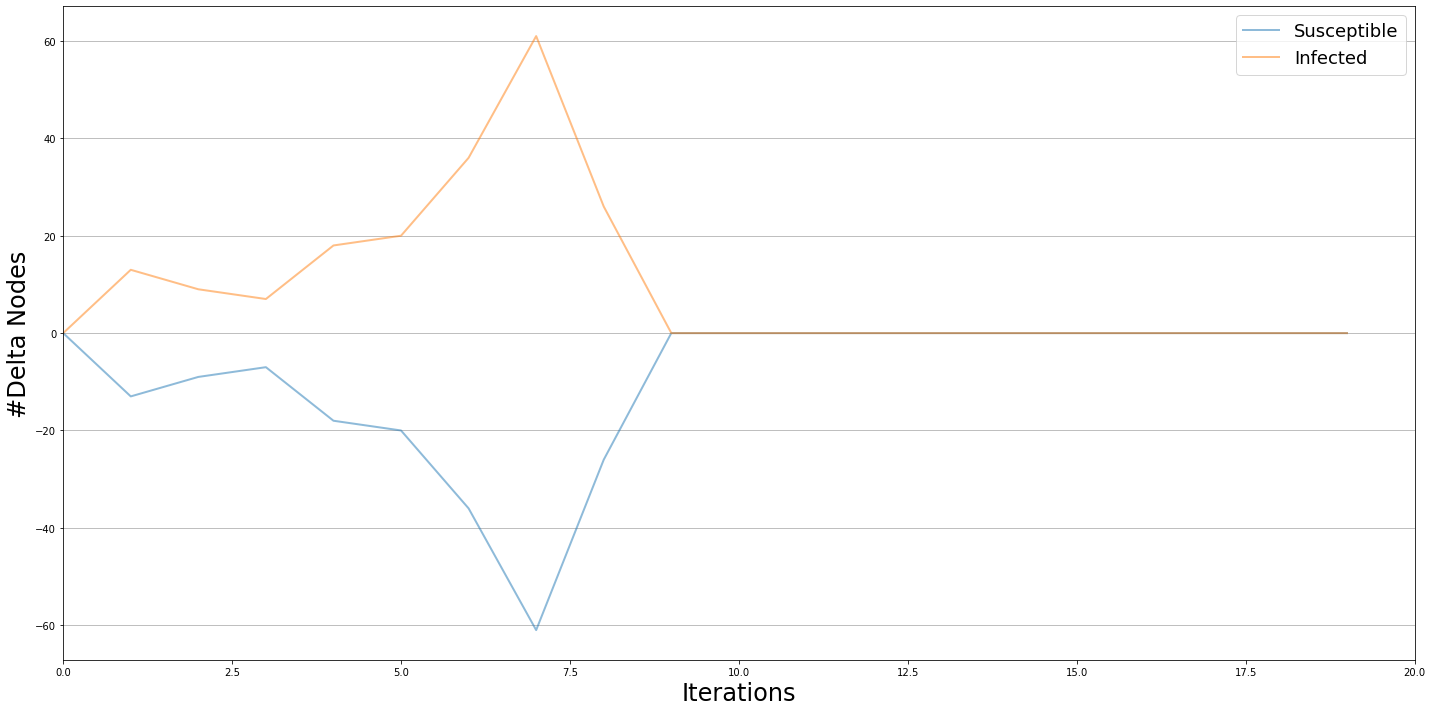

In [ ]:
viz2 = DiffusionPrevalence(model, trends)
viz2.plot()

# **Independent Cascades**

---
Initially the 5% of the overall population (10 out of 200 nodes) is infected. All edges have a threshold of 0.4 for allowing infection



{'Susceptible': 0, 'Infected': 1, 'Removed': 2}


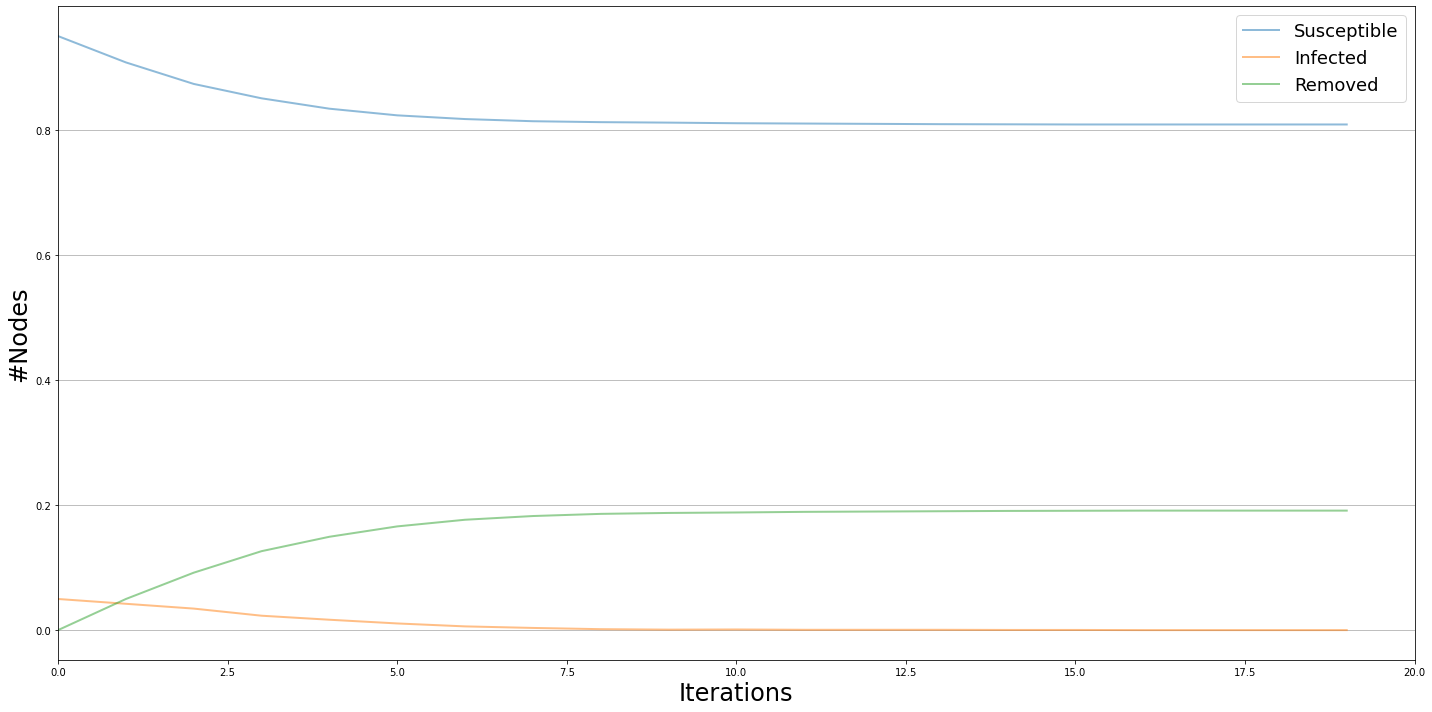

In [ ]:
# Model selection
model = ep.IndependentCascadesModel(G)
# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.05)
# Setting the edge parameters
threshold = 0.8
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)
print(model.available_statuses)
# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

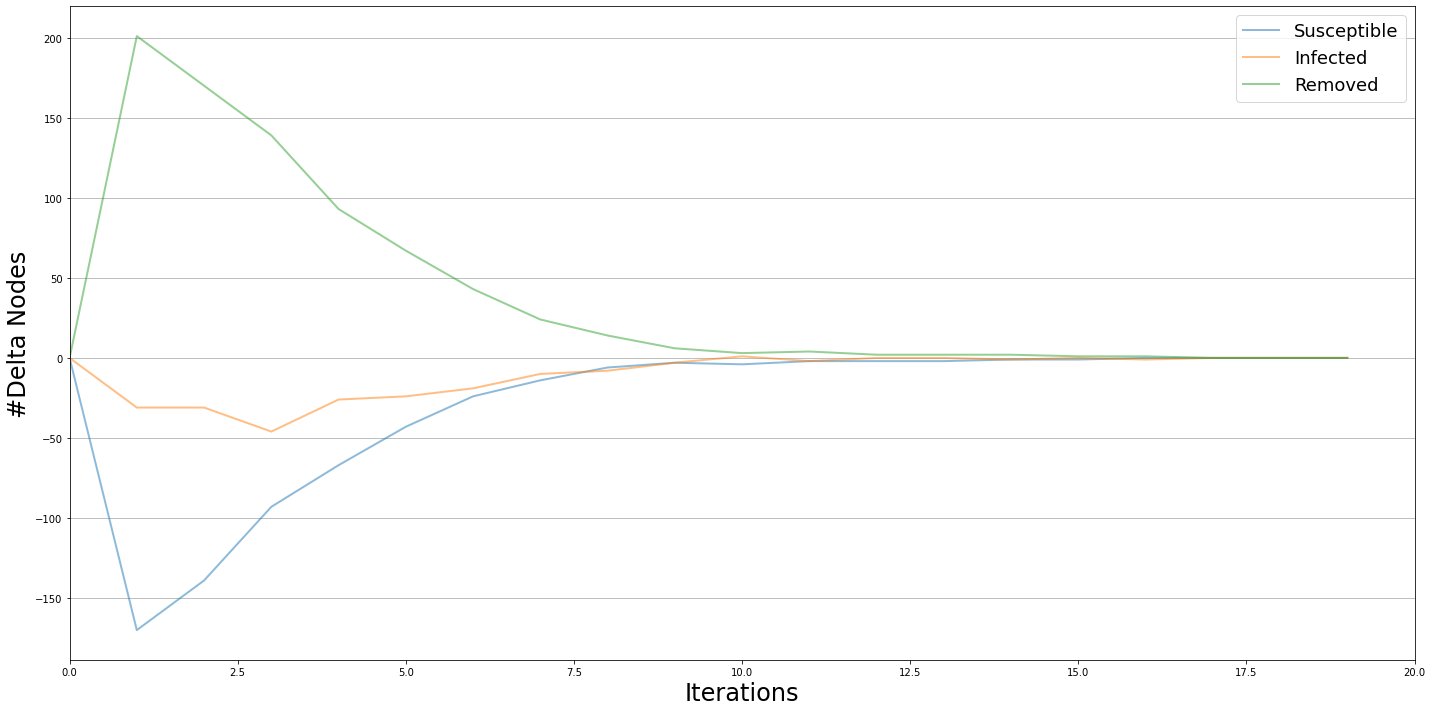

In [ ]:
viz2 = DiffusionPrevalence(model, trends)
viz2.plot()

# **The influence spread function is monotonous**

---

Test with an increasing fraction_infected in {0.01, 0.05, 0.1}

{'Susceptible': 0, 'Infected': 1, 'Removed': 2}


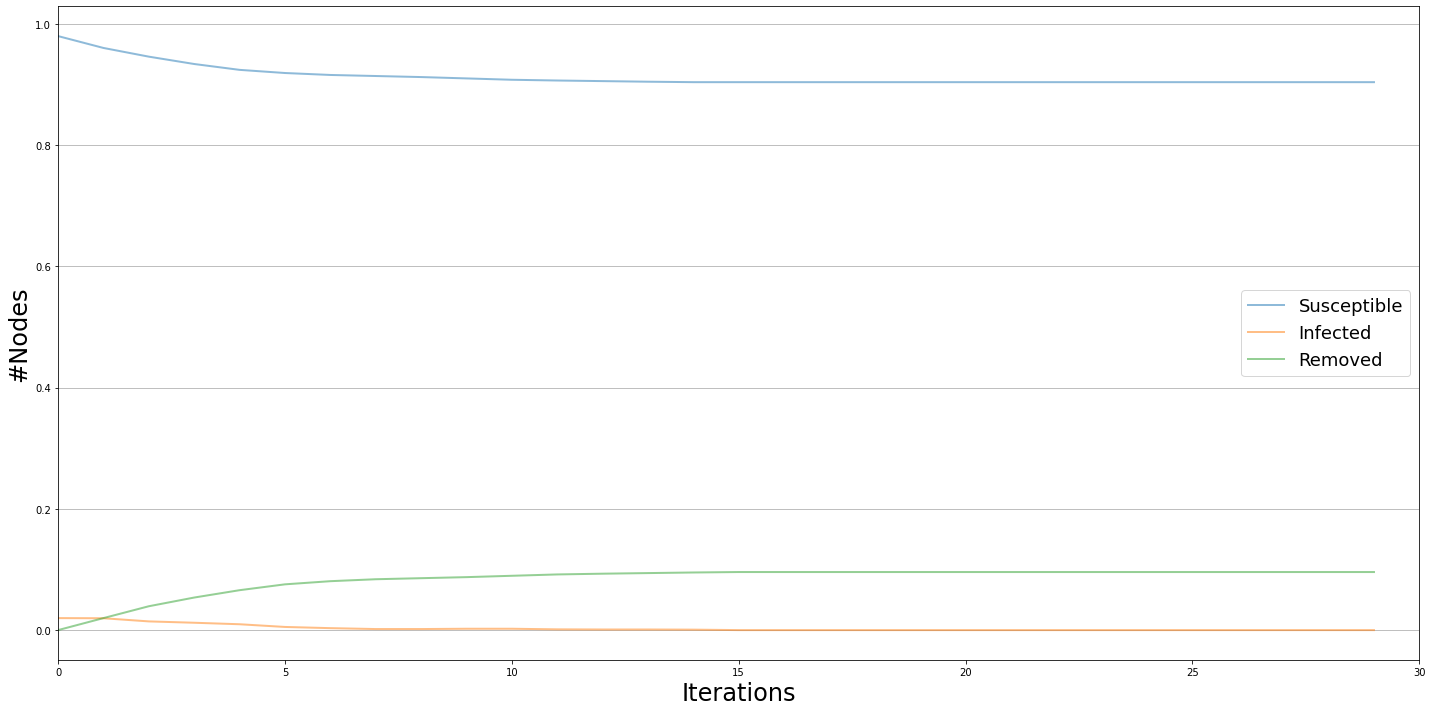

In [ ]:
# Model selection
model = ep.IndependentCascadesModel(G)
# Model Configuration
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.02)
# Setting the edge parameters
threshold = 0.4
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)
print(model.available_statuses)
# Simulation execution
iterations = model.iteration_bunch(30)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

In [ ]:
pr = nx.pagerank(G, alpha=0.8)
# pr = nx.betweenness_centrality(g)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)

[3437, 107, 1684, 0, 1912, 348, 686, 3980, 414, 698]


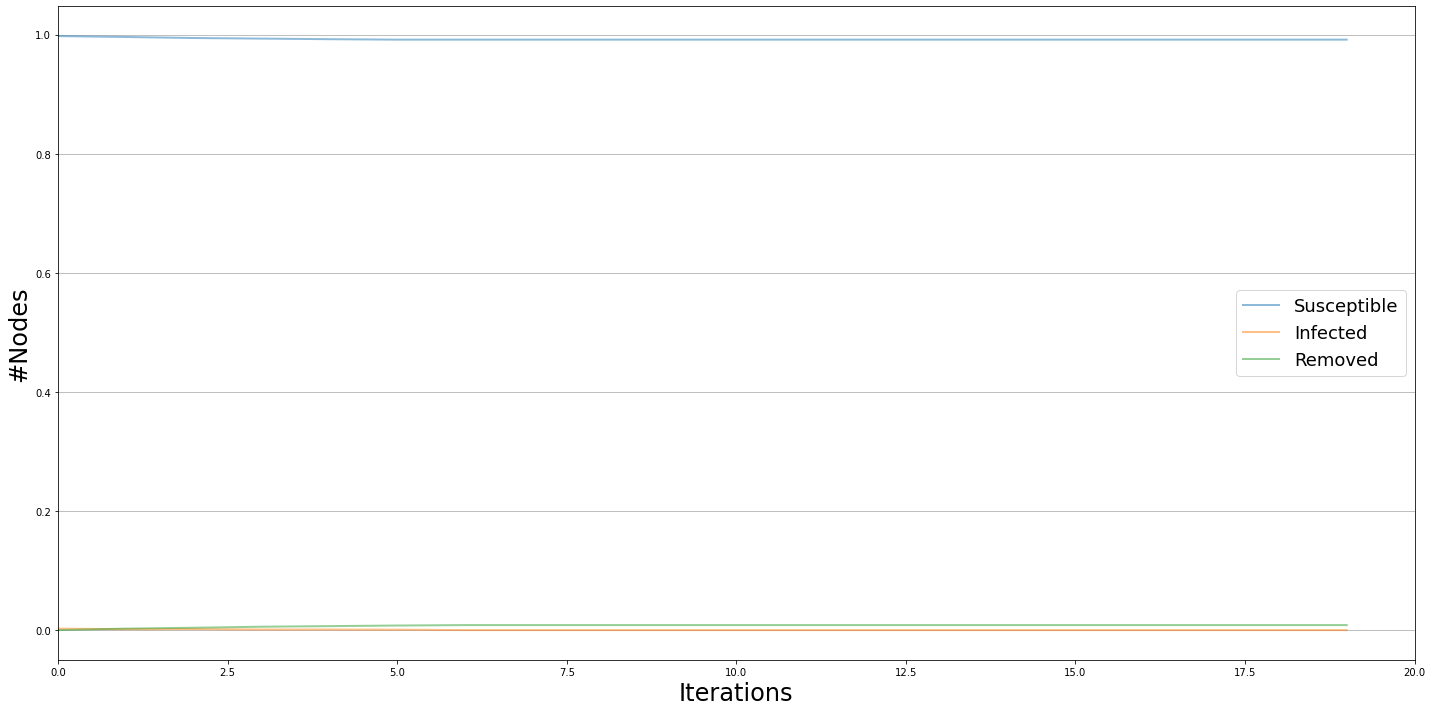

In [ ]:
# Model selection
model = ep.IndependentCascadesModel(G)
# Model Configuration
config = mc.Configuration()

# config.add_model_parameter('fraction_infected', 0.05)
config.add_model_initial_configuration("Infected", infected_nodes)
# Setting the edge parameters
threshold = 0.4
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

**Voter Model**

40% of the 200 nodes are infected (e.g. votes YES)

In [ ]:
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [ ]:
import collections
%matplotlib inline
def plot_degree_dist(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())

  fig, ax = plt.subplots()
  plt.bar(deg, cnt, width=0.80, color="b")

  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  ax.set_xticks([d + 0.4 for d in deg])
  ax.set_xticklabels(deg)

  # draw graph in inset
  plt.axes([0.4, 0.4, 0.5, 0.5])
  Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
  pos = nx.spring_layout(G)
  plt.axis("off")
  nx.draw_networkx_nodes(G, pos, node_size=20)
  nx.draw_networkx_edges(G, pos, alpha=0.4)
  plt.show()

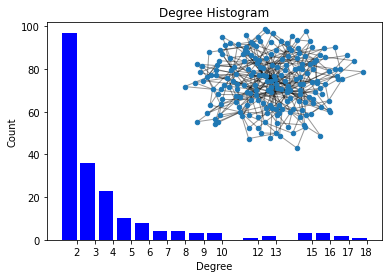

396


In [ ]:
# Network topology
# g = nx.erdos_renyi_graph(100, 0.1)
g = nx.barabasi_albert_graph(200,2)
plot_degree_dist(g)
print(g.number_of_edges())

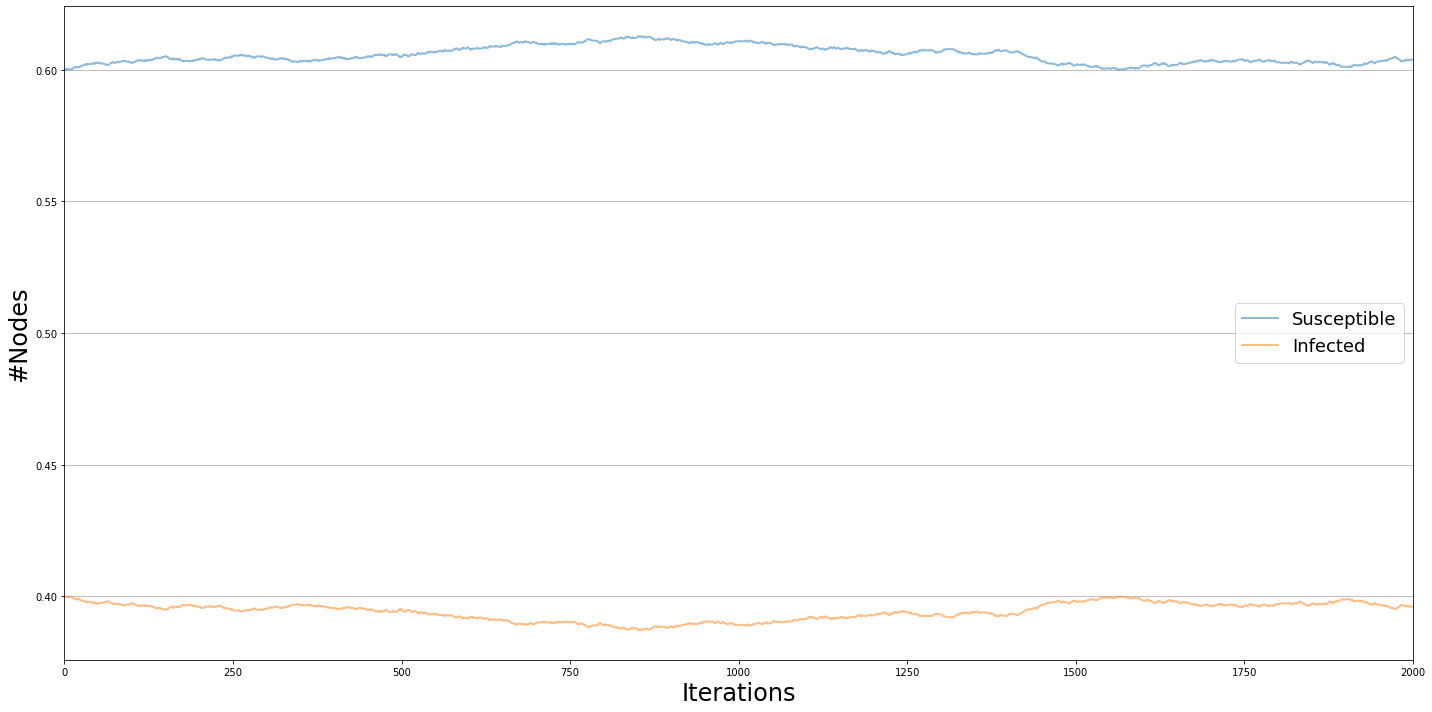

In [ ]:
# Model selection
model = op.VoterModel(G)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.4)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

Some nodes are blocked and do not change opinion

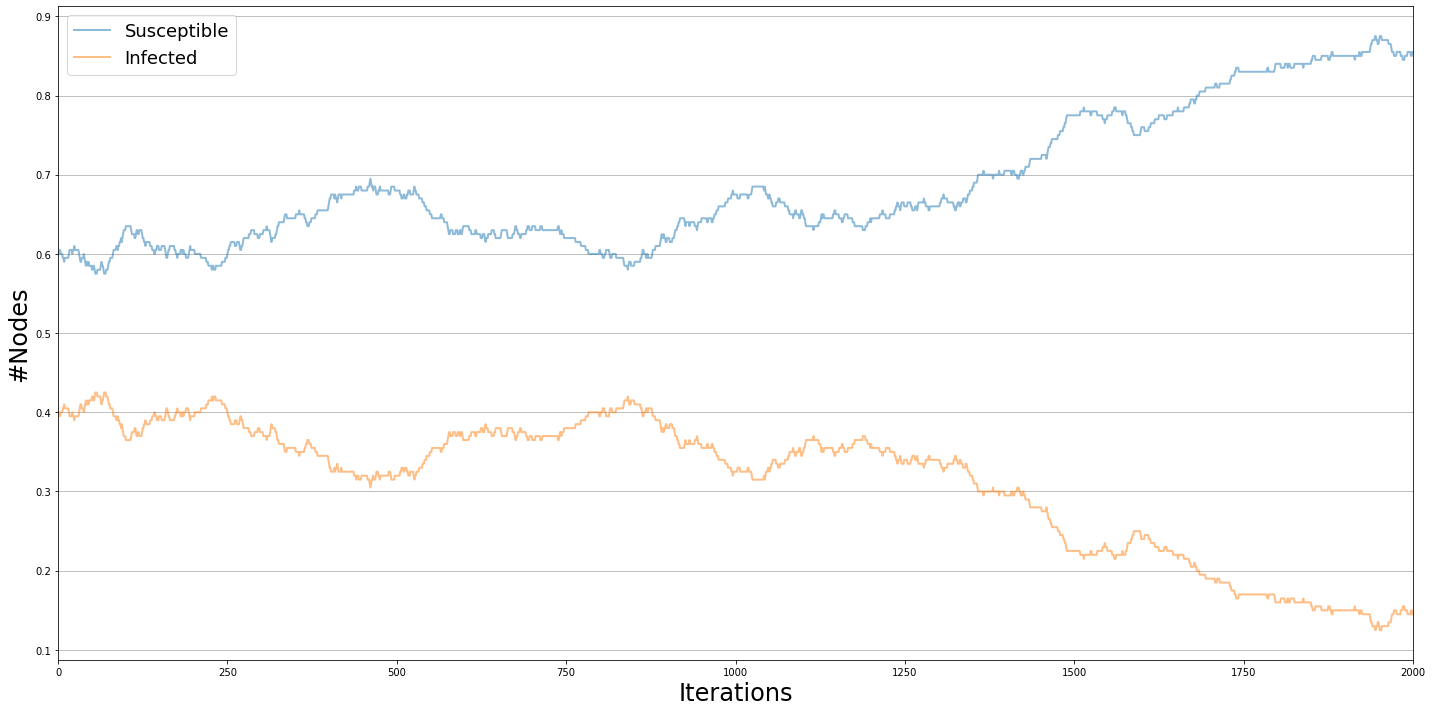

In [ ]:
# Model selection
model = op.VoterModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.40)
config.add_model_parameter('percentage_blocked', 0.3)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

# QVoter Model

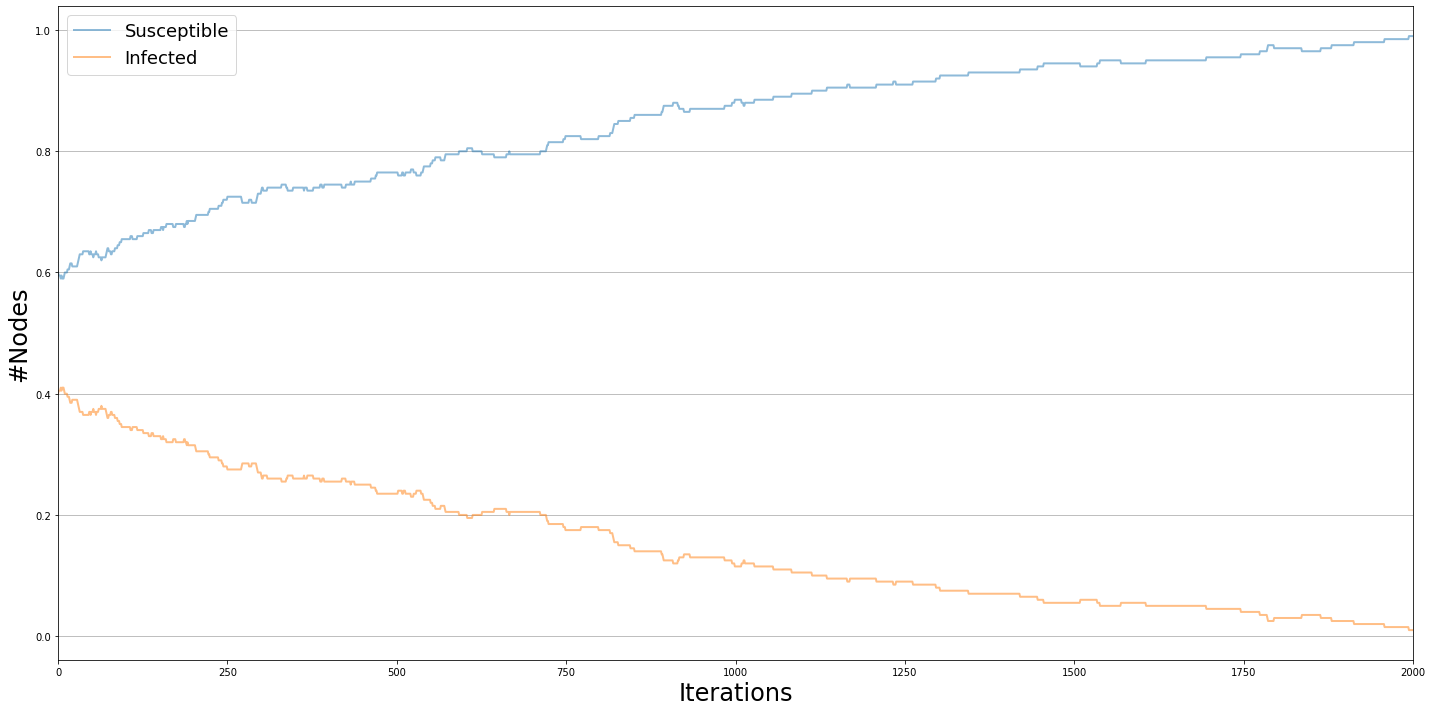

200 396


In [ ]:
# Model selection
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 2)
config.add_model_parameter('fraction_infected', 0.40)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()
print(g.number_of_nodes(), g.number_of_edges())

In [ ]:
pr = nx.pagerank(g, alpha=0.8)
# pr = nx.betweenness_centrality(g)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:int(g.number_of_nodes()*0.25)]
print(infected_nodes)

[23, 0, 22, 13, 2, 3, 9, 12, 1, 35, 16, 14, 56, 32, 17, 78, 6, 15, 21, 41, 10, 5, 31, 39, 11, 53, 42, 4, 20, 33, 19, 27, 29, 7, 85, 90, 24, 36, 55, 75, 54, 37, 44, 30, 143, 98, 144, 69, 115, 74]


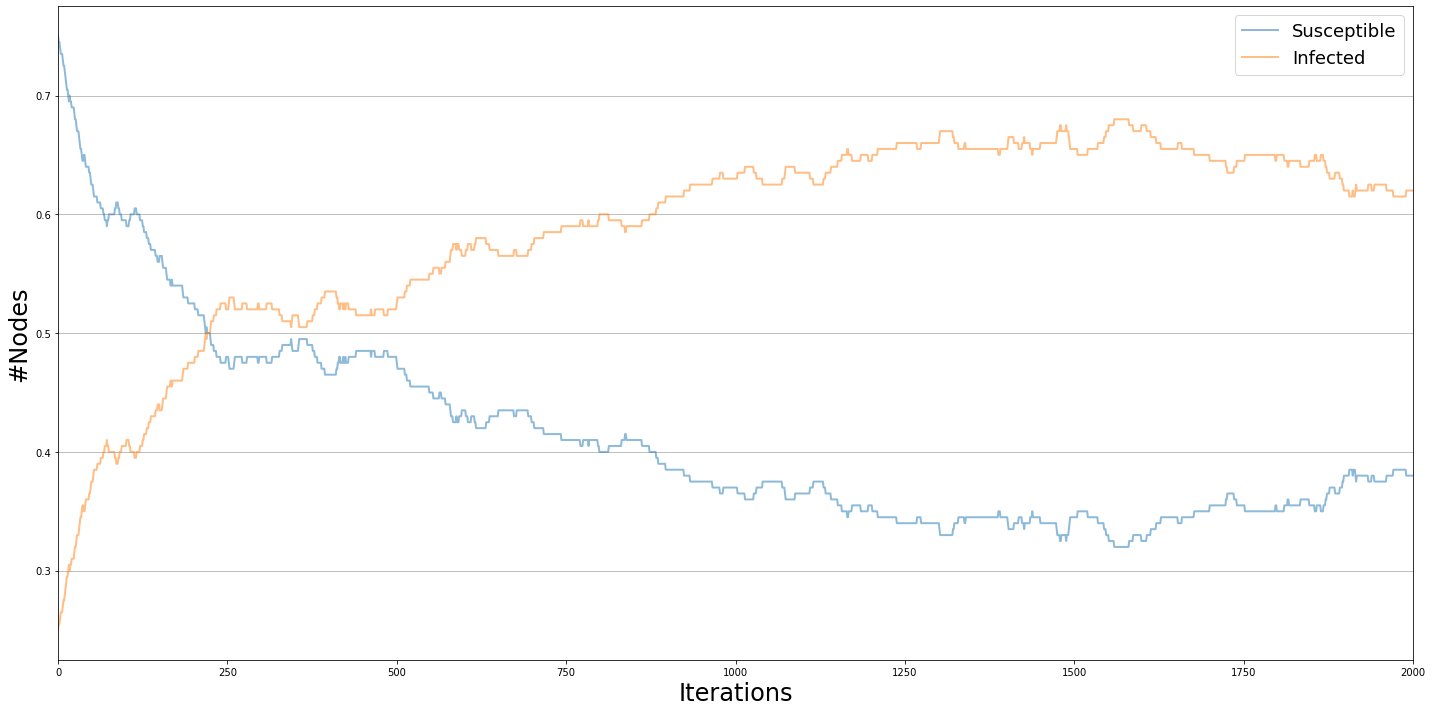

200 396


In [ ]:
# Model selection
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 2)
config.add_model_initial_configuration("Infected", infected_nodes)
# config.add_model_parameter('fraction_infected', 0.40)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()
print(g.number_of_nodes(), g.number_of_edges())

# Majority Vote model

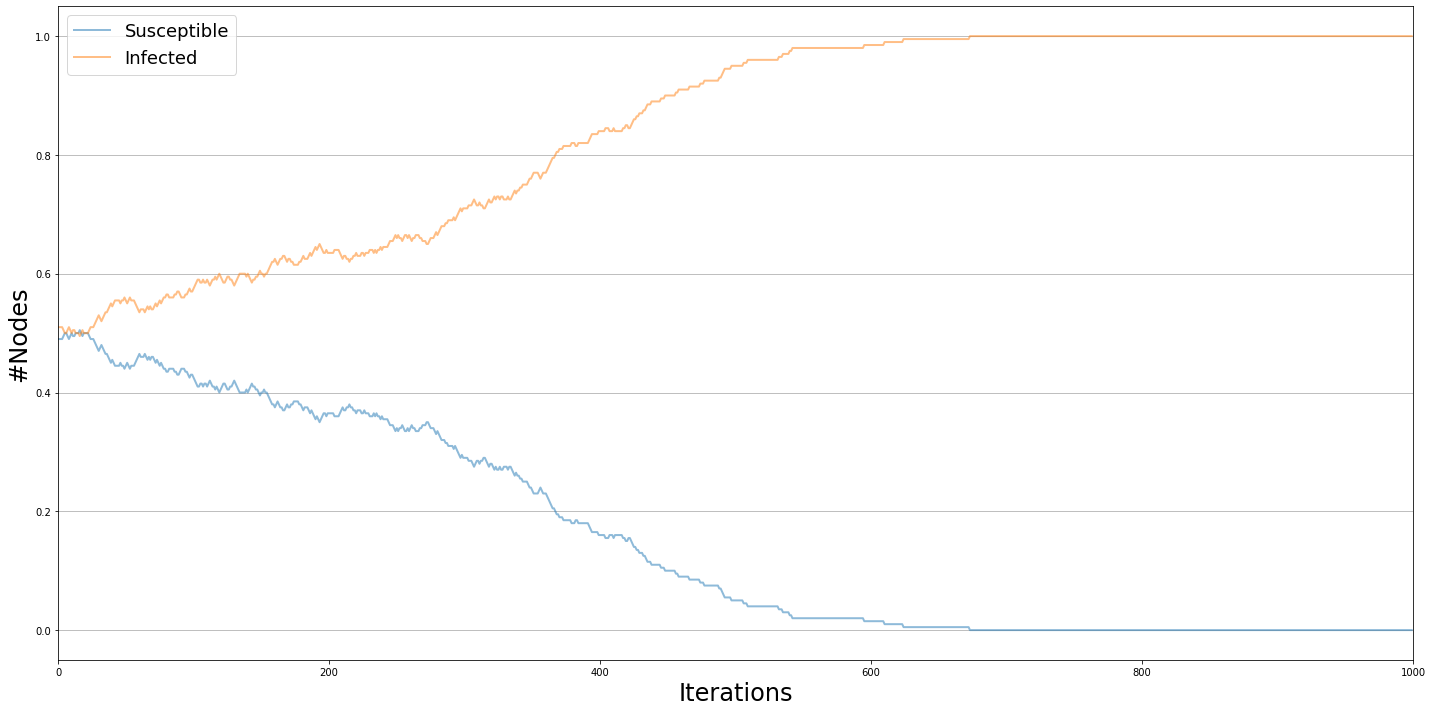

200 396


In [ ]:
# Model selection
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.51)
config.add_model_parameter('q', 3)  # q must be an odd number to break ties
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()
print(g.number_of_nodes(), g.number_of_edges())

# QVoter with seeds

Randomly select 20 seeds (10%) to infect

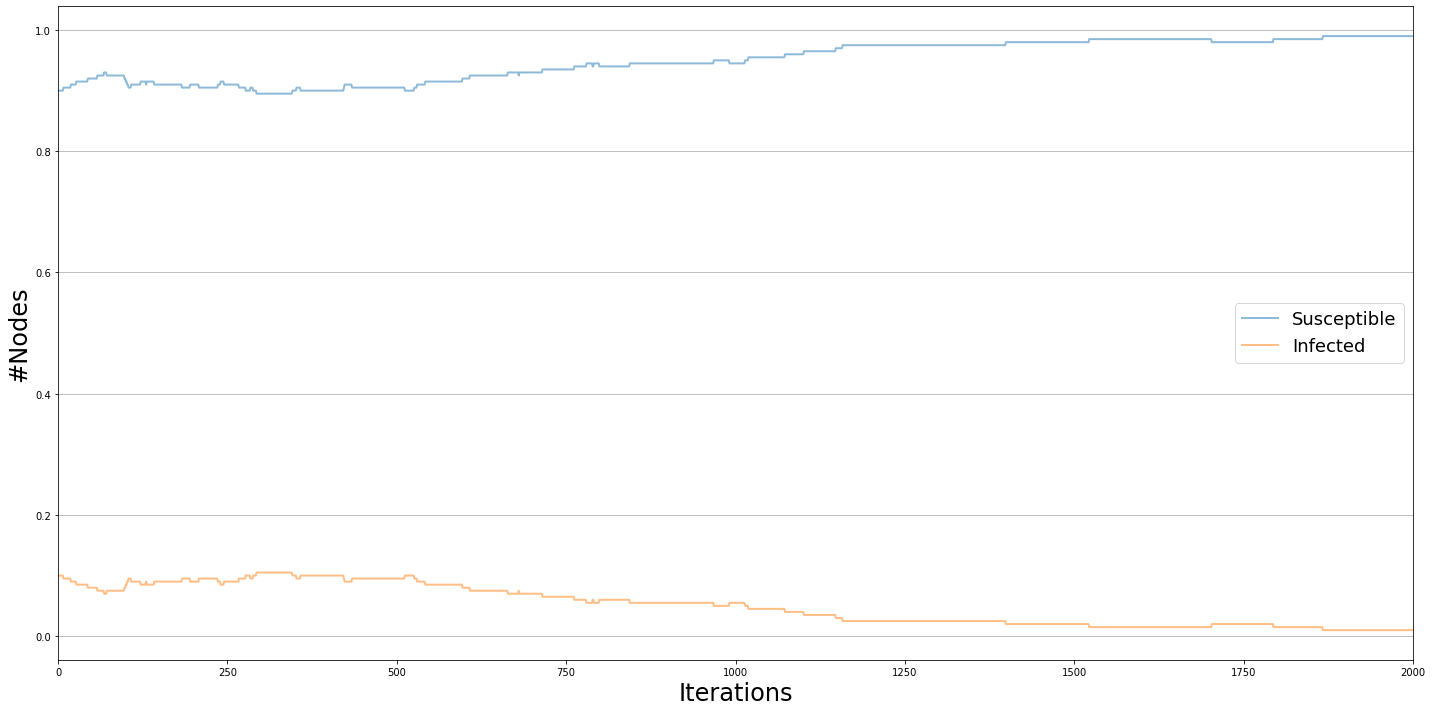

200 396


In [ ]:
# Model selection
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 2)
# infected_nodes = [tup[0] for tup in sorted(g.degree, key=lambda x: x[1], reverse=False)[0:10]]
# config.add_model_initial_configuration("Infected", infected_nodes)
config.add_model_parameter('fraction_infected', 0.1)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()
print(g.number_of_nodes(), g.number_of_edges())

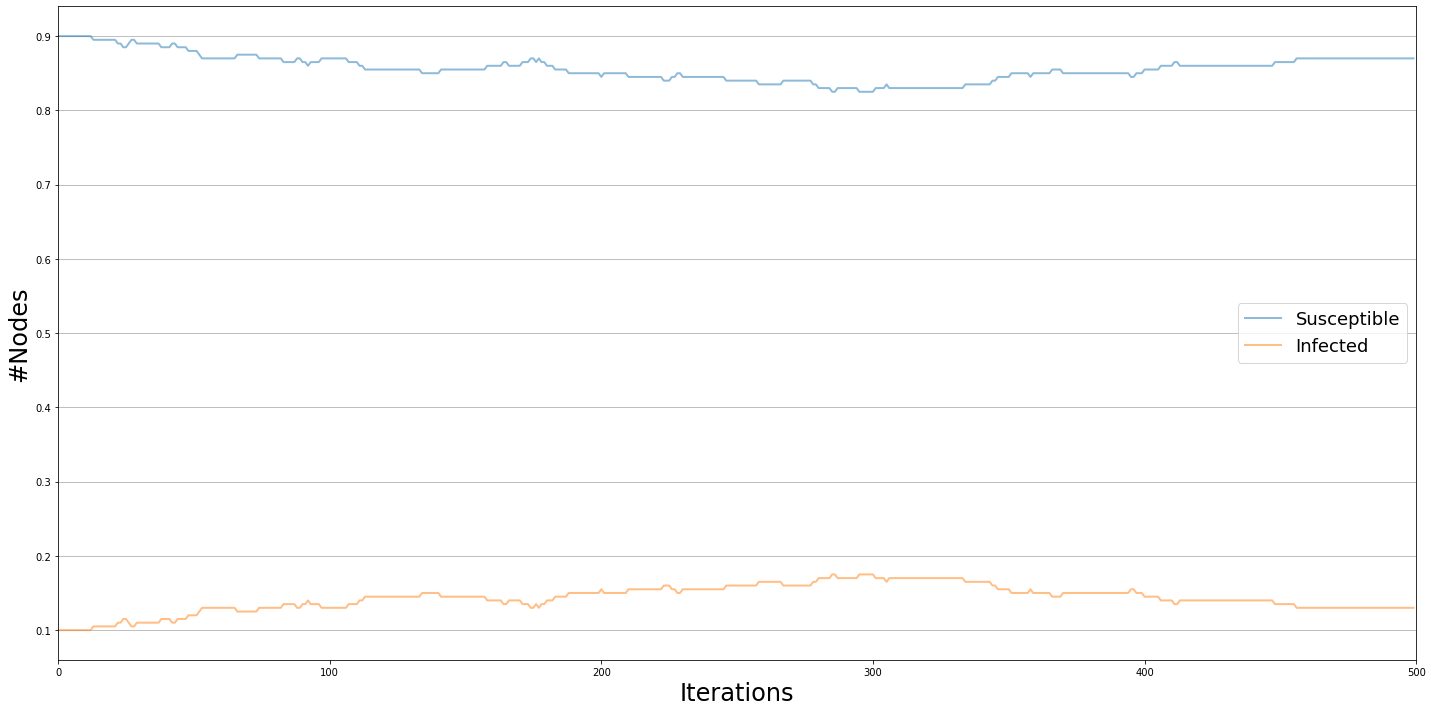

200 396


In [ ]:
# Model selection
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 2)
infected_nodes = [tup[0] for tup in sorted(g.degree, key=lambda x: x[1], reverse=True)[0:20]]
config.add_model_initial_configuration("Infected", infected_nodes)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()
print(g.number_of_nodes(), g.number_of_edges())

#Test with another graph

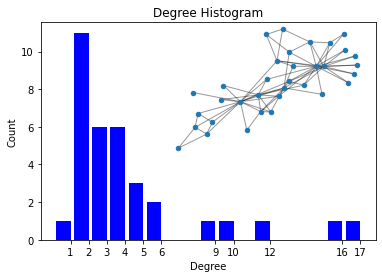

200 78


In [ ]:
G = nx.karate_club_graph()
plot_degree_dist(G)
print(g.number_of_nodes(), G.number_of_edges())

Test with an increasing number of seed infected users

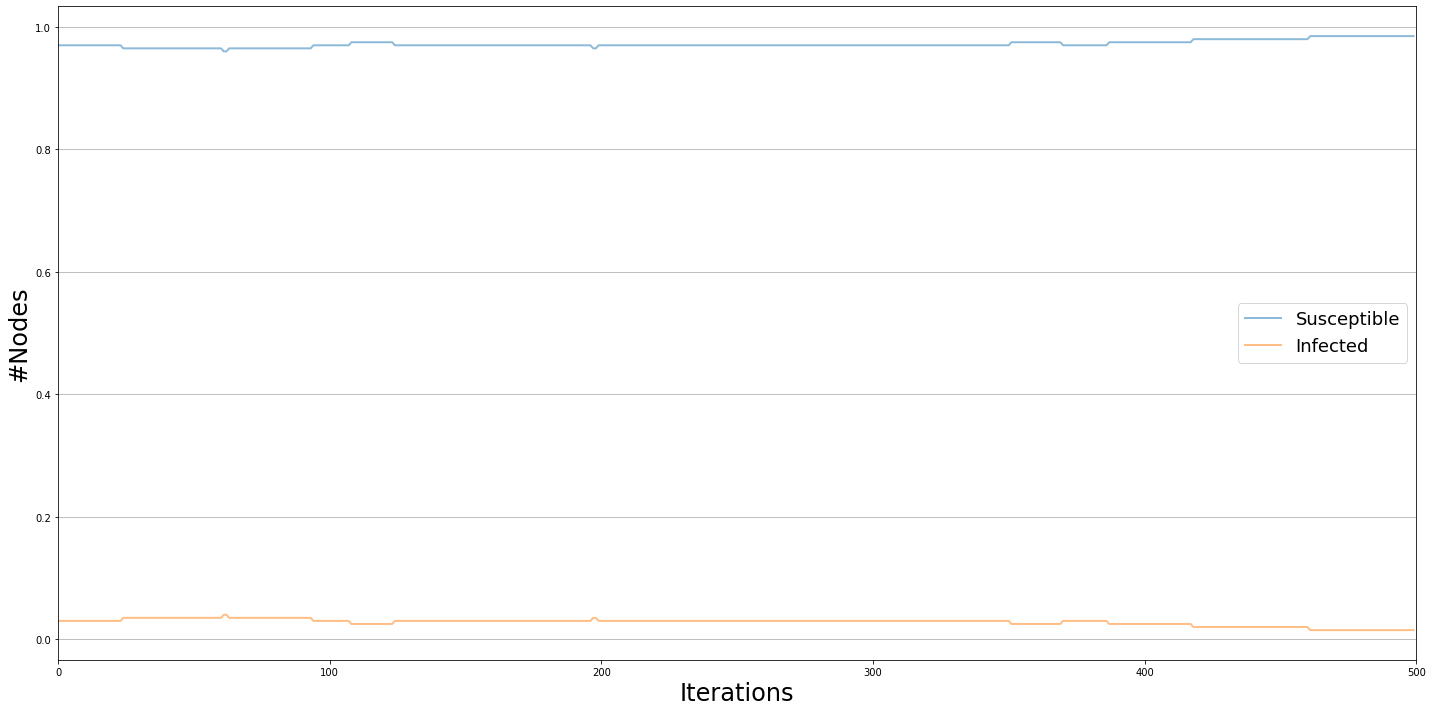

In [ ]:
# Model selection
model = op.QVoterModel(g)
config = mc.Configuration()
config.add_model_parameter("q", 3)
infected_nodes = [tup[0] for tup in sorted(g.degree, key=lambda x: x[1], reverse=True)[0:6]]
config.add_model_initial_configuration("Infected", infected_nodes)
# config.add_model_parameter('fraction_infected', 0.2)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

**Greedy Influence Maximisation**

In [ ]:
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import numpy as np

In [ ]:
import collections
%matplotlib inline
def plot_degree_dist(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())

  fig, ax = plt.subplots()
  plt.bar(deg, cnt, width=0.80, color="b")

  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  ax.set_xticks([d + 0.4 for d in deg])
  ax.set_xticklabels(deg)

  # draw graph in inset
  plt.axes([0.4, 0.4, 0.5, 0.5])
  Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
  pos = nx.spring_layout(G)
  plt.axis("off")
  nx.draw_networkx_nodes(G, pos, node_size=20)
  nx.draw_networkx_edges(G, pos, alpha=0.4)
  plt.show()

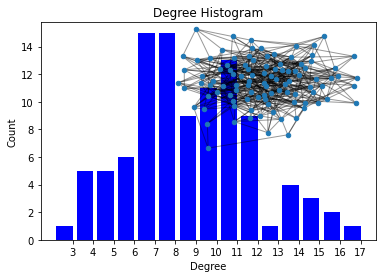

100 457


In [ ]:
# Network topology
g = nx.erdos_renyi_graph(100, 0.1)
# g = nx.karate_club_graph()
# g = nx.barabasi_albert_graph(200,2)
plot_degree_dist(g)
print(g.number_of_nodes(), g.number_of_edges())

In [ ]:
def get_maximum_influence_across_iterations(model):
  iterations = model.iteration_bunch(100)
  max=0
  for i in iterations:
    if i.get('node_count').get(1)>max:
      max=i.get('node_count').get(1)
  return max

def get_best_candidate(model, seeds, candidates):
  all_max_inf=[]
  for n in candidates:
    temp_seeds = []
    temp_seeds.append(x for x in seeds)
    temp_seeds.append(n)
    model = ep.IndependentCascadesModel(g)
    config = mc.Configuration()
    threshold = 0.1
    for i in g.nodes():
      config.add_node_configuration("threshold", i, threshold)
    config.add_model_initial_configuration("Infected", temp_seeds)
    model.set_initial_status(config) 
    max=get_maximum_influence_across_iterations(model)
    all_max_inf.append(max)
  print(np.asarray(all_max_inf).max())
  return candidates[np.asarray(all_max_inf).argmax()] 

In [ ]:
model = ep.IndependentCascadesModel(g)
config = mc.Configuration()
threshold = 0.1
all_nodes=set()
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    all_nodes.add(i)

seeds=set()
k=10
for _ in range(k):
  candidates=list(all_nodes-seeds)
  next_best=get_best_candidate(model,seeds,candidates)
  seeds.add(next_best)

  # break
# trends = model.build_trends(iterations)
# viz = DiffusionTrend(model, trends)
# viz.plot()

9
15
9
8
11
10
10
10
8
9


In [ ]:
seeds

{18, 25, 27, 39, 40, 56, 57, 66, 68, 81}

Select the top connected users

In [ ]:
pr = nx.pagerank(g, alpha=0.8)
# pr = nx.betweenness_centrality(g)
infected_nodes = [k for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True)][0:10]
print(infected_nodes)

[51, 67, 8, 59, 89, 15, 77, 52, 85, 17]


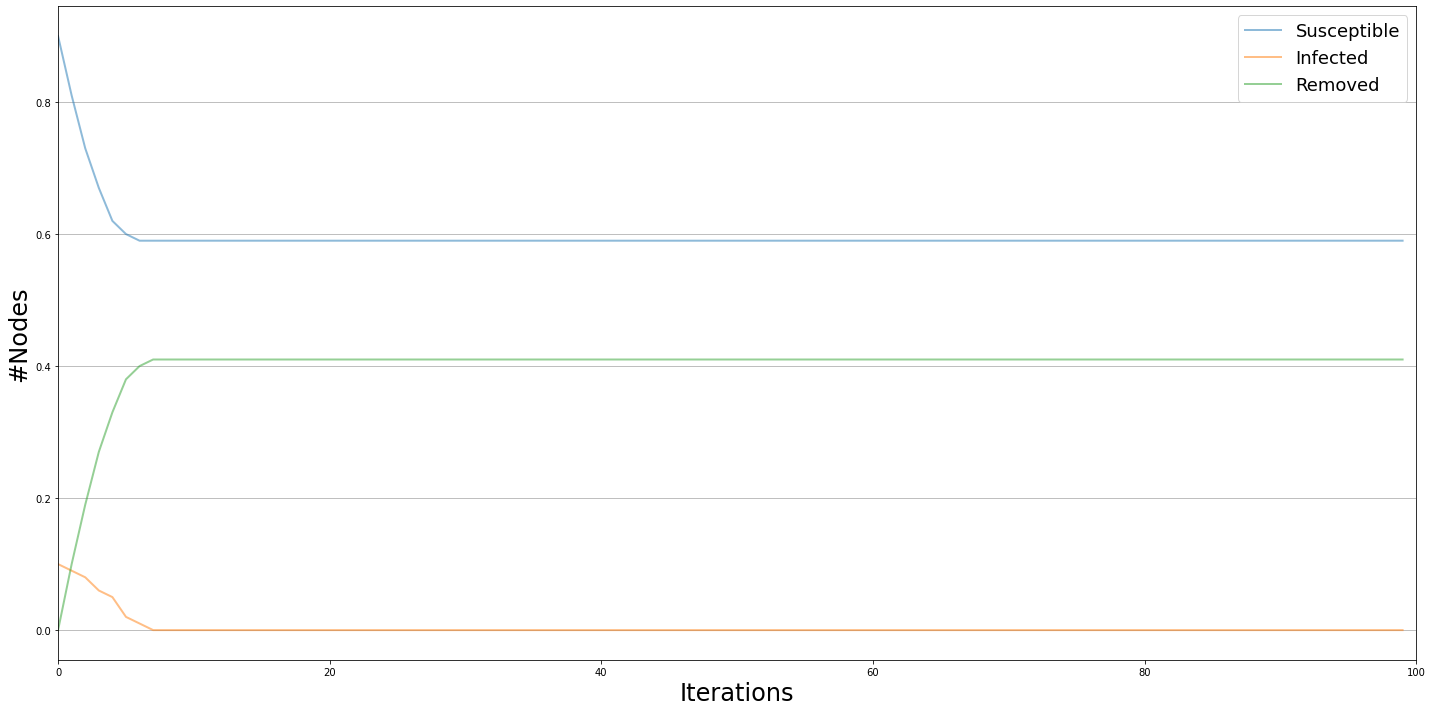

In [ ]:
# Model selection
model = ep.IndependentCascadesModel(g)
config = mc.Configuration()
# config.add_model_initial_configuration("Infected", infected_nodes)
config.add_model_initial_configuration("Infected", seeds)
threshold = 0.1
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

# **Dynamic Networks**

In [ ]:
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import dynetx as dn
import ndlib.models.ModelConfig as mc
import ndlib.models.dynamic as dm
from past.builtins import xrange
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import matplotlib.pyplot as plt

In [ ]:
import collections
%matplotlib inline
def plot_degree_dist(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())

  fig, ax = plt.subplots()
  plt.bar(deg, cnt, width=0.80, color="b")

  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  ax.set_xticks([d + 0.4 for d in deg])
  ax.set_xticklabels(deg)

  # draw graph in inset
  plt.axes([0.4, 0.4, 0.5, 0.5])
  Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
  pos = nx.spring_layout(G)
  plt.axis("off")
  nx.draw_networkx_nodes(G, pos, node_size=20)
  nx.draw_networkx_edges(G, pos, alpha=0.4)
  plt.show()

def plot_degree_dist_dyn(G):
  degree_sequence = sorted([d for d in dn.degree(G).values()], reverse=True)  # degree sequence
  
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())

  fig, ax = plt.subplots()
  plt.bar(deg, cnt, width=0.80, color="b")

  plt.title("Degree Histogram")
  plt.ylabel("Count")
  plt.xlabel("Degree")
  ax.set_xticks([d + 0.4 for d in deg])
  ax.set_xticklabels(deg)

  # draw graph in inset
  plt.axes([0.4, 0.4, 0.5, 0.5])
  Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
  pos = nx.spring_layout(G)
  plt.axis("off")
  nx.draw_networkx_nodes(G, pos, node_size=20)
  nx.draw_networkx_edges(G, pos, alpha=0.4)
  plt.show()

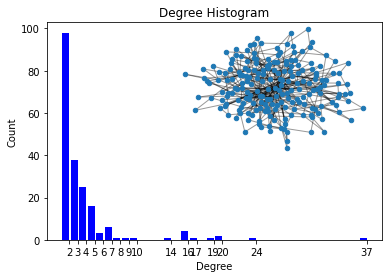

200 396


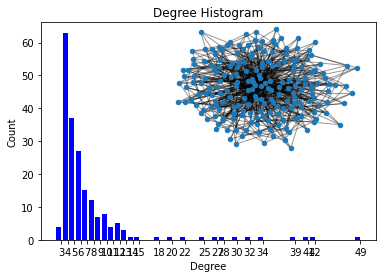

200 767


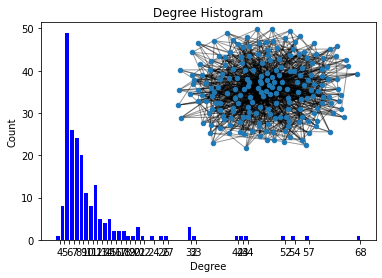

200 1117


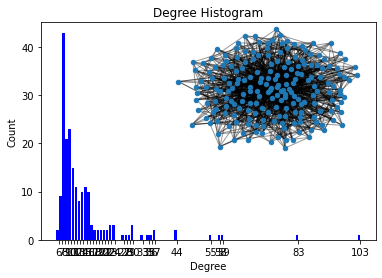

200 1447


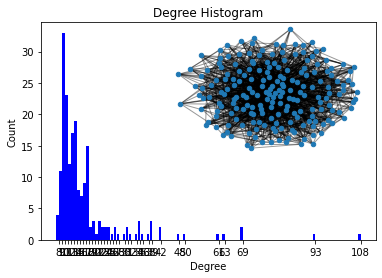

200 1768


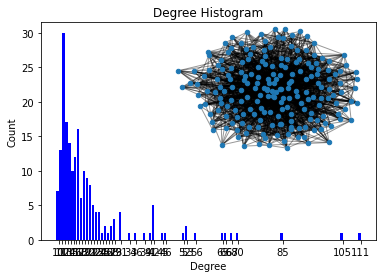

200 2077


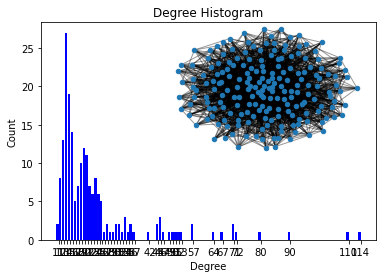

200 2391


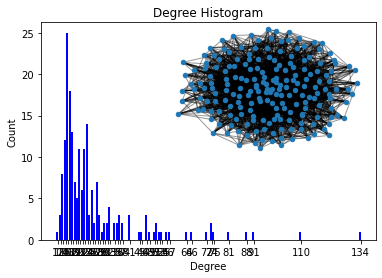

200 2682


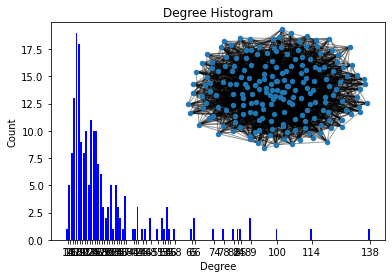

200 2962


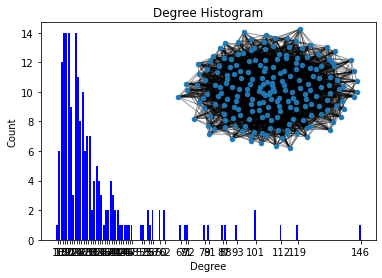

200 3228


/usr/local/lib/python3.7/dist-packages/ndlib/models/DynamicDiffusionModel.py:203: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


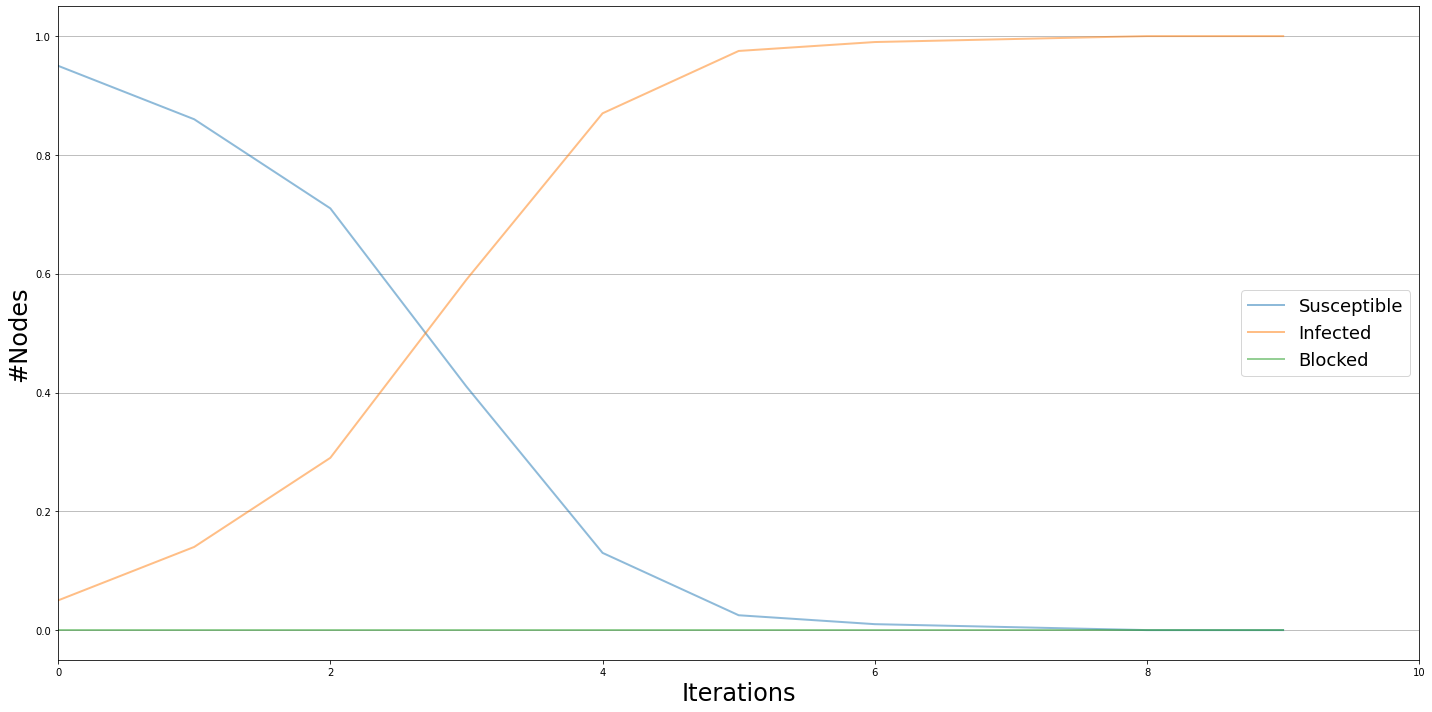

In [ ]:
# Dynamic Network topology
dg = dn.DynGraph()

for t in xrange(0, 10):
    g = nx.barabasi_albert_graph(200,2)
    dg.add_interactions_from(g.edges(), t)
    plot_degree_dist_dyn(dg)
    print(dg.number_of_nodes(),dg.number_of_edges())

# Model selection
model = dm.DynProfileThresholdModel(dg)
config = mc.Configuration()
config.add_model_parameter('blocked', 0)
config.add_model_parameter('adopter_rate', 0)
config.add_model_parameter('fraction_infected', 0.1)

# Setting nodes parameters
threshold = 0.15
profile = 0.25
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)
    config.add_node_configuration("profile", i, profile)

model.set_initial_status(config)


# Simulate snapshot based execution
iterations = model.execute_snapshots()
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
viz.plot()

# **SEIRS plus**

In [ ]:
!pip install seirsplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.9 MB/s 
  Created wheel for seirsplus: filename=seirsplus-1.0.9-py3-none-any.whl size=64632 sha256=8e643ab4dfcf7df2843f446ad4c9d896dfd3fd01cd2cc2c1a4eb9bf43a3bbd1a
  Stored in directory: /root/.cache/pip/wheels/23/8f/4f/04f0d234e0258559a69487b9f73b0518930a3c3586c32003e0
Successfully built seirsplus


In [ ]:
from seirsplus.models import *
import networkx

t = 364.90


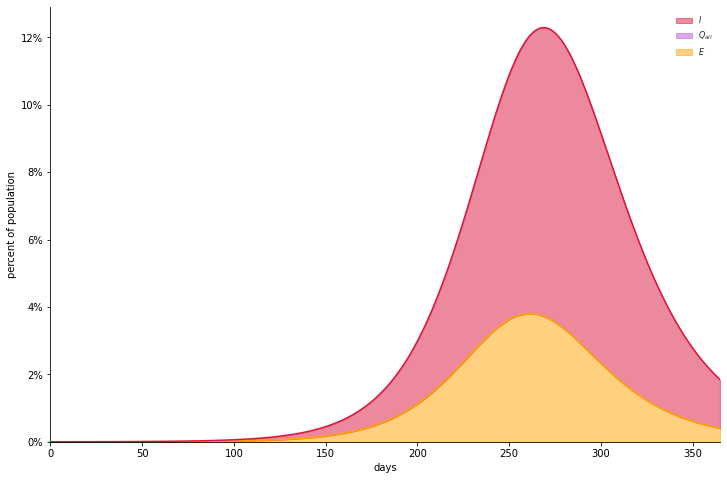

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f3509d810>)

In [ ]:
# beta:	rate of transmission
# sigma:	rate of progression
# gamma:	rate of recovery
# xi:	rate of re-susceptibility	
# mu_I:	rate of infection-related mortality	
model = SEIRSModel(initN=10000000, initI=100, beta=0.147, sigma=1/5.2, gamma=1/12.39, xi=0.001, mu_I=0.0004)
model.run(T=365)
model.figure_infections()

[Checkpoint: Updating parameters]
t = 49.90
[Checkpoint: Updating parameters]
t = 149.90


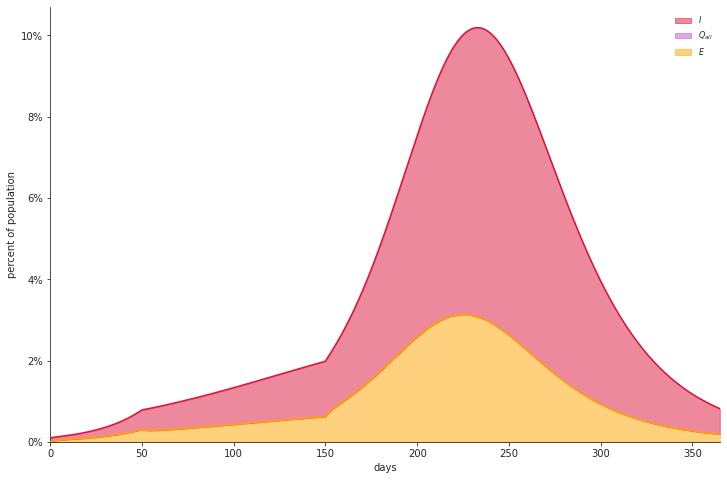

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f346d1a10>)

In [ ]:
# Impose social distancing for 100 days at day 50 at a certain checkpoint
# theta_E	rate of testing for exposed individuals	
# theta_I	rate of testing for infectious individuals
checkpoints={'t': [50, 150], 'beta': [0.10, 0.147], 'theta_E': [0.02, 0.02], 'theta_I': [0.02, 0.02]}
model = SEIRSModel(initN=100000, initI=100, beta=0.147, sigma=1/5.2, gamma=1/12.39, xi=0.001, mu_I=0.0004)
model.run(T=365, checkpoints=checkpoints)
model.figure_infections()

t = 364.90


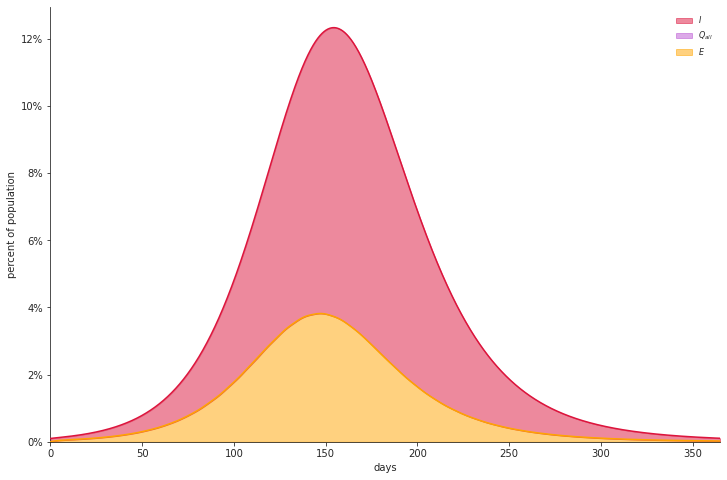

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f346a9d50>)

In [ ]:
model = SEIRSModel(initN=10000000, initI=10000, beta=0.147, sigma=1/5.2, gamma=1/12.39, xi=0.001, mu_I=0.0004, beta_Q=0.147, sigma_Q=1/5.2, gamma_Q=1/12.39, mu_Q=0.0004, psi_E=1, psi_I=1)
model.run(T=365)
model.figure_infections()

[Checkpoint: Updating parameters]
t = 49.90
[Checkpoint: Updating parameters]
t = 99.90


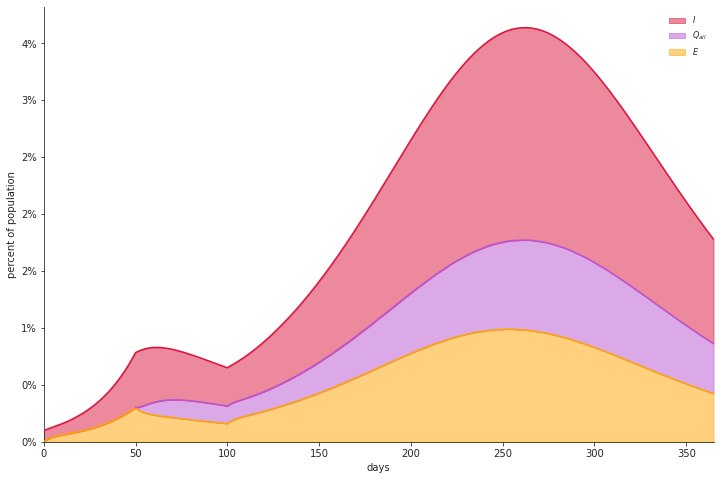

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f3458ccd0>)

In [ ]:
checkpoints={'t': [50, 100], 'beta': [0.100, 0.147], 'theta_E': [0.02, 0.02], 'theta_I': [0.02, 0.02]}
model = SEIRSModel(initN=10000000, initI=10000, beta=0.147, sigma=1/5.2, gamma=1/12.39, xi=0.001, mu_I=0.0004, beta_Q=0.147, sigma_Q=1/5.2, gamma_Q=1/12.39, mu_Q=0.0004, psi_E=1, psi_I=1)
model.run(T=365, checkpoints=checkpoints)
model.figure_infections()
# model.figure_basic()

# **SEIRS with network**

In [ ]:
!pip install seirsplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from seirsplus.models import *
from seirsplus.networks import *
import networkx

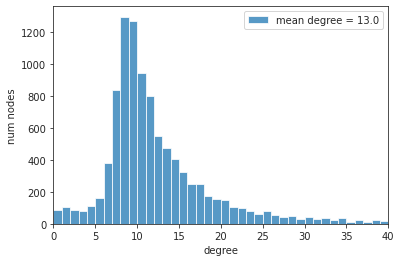

In [ ]:
numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=40)

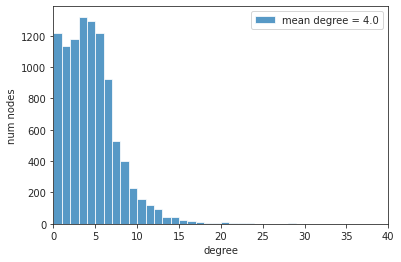

In [ ]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing, max_degree=40)

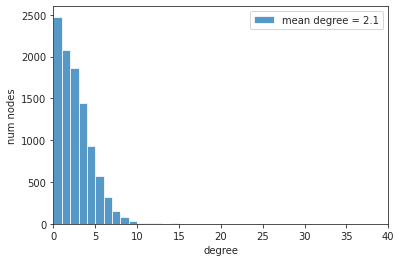

In [ ]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)
plot_degree_distn(G_quarantine, max_degree=40)

In [ ]:
SIGMA  = 1/5.2
GAMMA  = 1/12.39
MU_I   = 0.0004

R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

P      = 0.2
Q      = 0.05

t = 0.04
t = 10.00
t = 20.01
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.00
t = 90.01
t = 100.02
t = 110.00
t = 120.01
t = 130.00
t = 140.00
t = 150.08
t = 160.10
t = 170.73
t = 180.51
t = 190.20
t = 200.55
t = 210.28


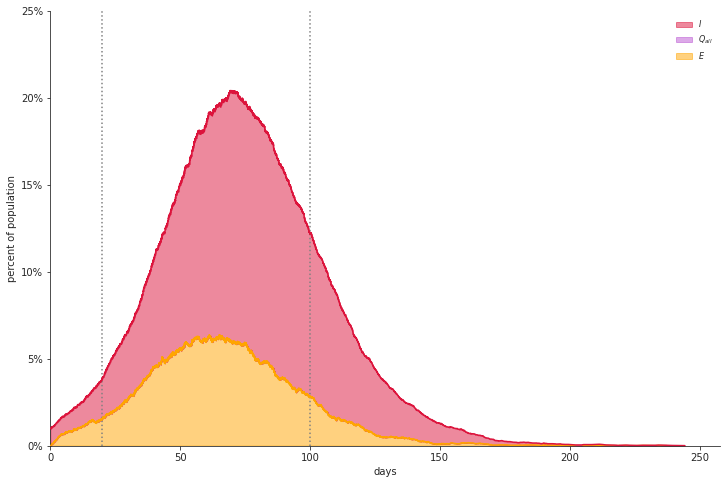

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f35672150>)

In [ ]:
model = SEIRSNetworkModel(G       = G_normal, beta    = BETA, sigma   = SIGMA, gamma   = GAMMA, mu_I    = MU_I, mu_0    = 0, nu      = 0, xi      = 0, p       = P, 
                          G_Q     = G_quarantine, beta_Q  = BETA_Q, sigma_Q = SIGMA, gamma_Q = GAMMA, mu_Q    = MU_I, theta_E = 0, theta_I = 0, phi_E   = 0, phi_I   = 0, 
                          psi_E   = 1.0, psi_I   = 1.0, q = Q, initI   = numNodes/100, initE   = 0, initQ_E = 0, initQ_I = 0, initR   = 0, initF   = 0)
checkpoints = {'t':       [20, 100]}
model.run(T=365)
model.figure_infections(vlines=checkpoints['t'], ylim=0.25)

t = 0.00
t = 10.02
[Checkpoint: Updating parameters]
t = 20.03
t = 30.03
t = 40.01
t = 50.00
t = 60.01
t = 70.01
t = 80.02
t = 90.01
[Checkpoint: Updating parameters]
t = 100.09
t = 110.00
t = 120.00
t = 130.04
t = 140.01
t = 150.01
t = 160.03
t = 170.04
t = 180.05
t = 190.00
t = 200.01
t = 210.00
t = 220.01
t = 230.01
t = 240.01
t = 250.00
t = 260.01
t = 270.00
t = 280.05
t = 290.00
t = 300.05
t = 310.13
t = 320.03
t = 330.03
t = 340.06
t = 350.13
t = 360.00


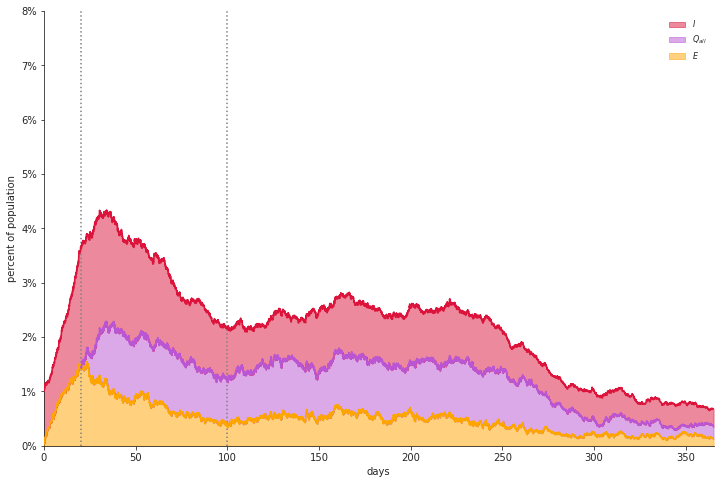

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f3537cbd0>)

In [ ]:
model = SEIRSNetworkModel(G       = G_normal, beta    = BETA, sigma   = SIGMA, gamma   = GAMMA, mu_I    = MU_I, mu_0    = 0, nu      = 0, xi      = 0, p       = P, 
                          G_Q     = G_quarantine, beta_Q  = BETA_Q, sigma_Q = SIGMA, gamma_Q = GAMMA, mu_Q    = MU_I, theta_E = 0, theta_I = 0, phi_E   = 0, phi_I   = 0, 
                          psi_E   = 1.0, psi_I   = 1.0, q = Q, initI   = numNodes/100, initE   = 0, initQ_E = 0, initQ_I = 0, initR   = 0, initF   = 0)
# social distancing at day 20
checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.5*P, P], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}
model.run(T=365, checkpoints=checkpoints)
model.figure_infections(vlines=checkpoints['t'], ylim=0.08)